<a href="https://colab.research.google.com/github/dilul/project-sentiment-analysis/blob/main/D3220766_Kananke_Liyanage_Research_Artefact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake Text and Image Detection
---

**Research Aim**
*   Research aims to create a scalable, transferable multimodal fake detection model that can identify fake content across text and images.

**Dataset**
*   The Fakeddit dataset is used in this study to detect fake text and images. This study considered 2-way labelled multimodal data which has both text and image.
* The dataset can be access via [this link](https://github.com/entitize/Fakeddit)


**Final Proposed Solution**
*  The final proposed solution is presented in the section
[✅ Proposed Model for Fake Detection](#scrollTo=LwmVzAG956F0)

*   The other sections contain the expriment results.


**Experiments**


*  This notebook contains the results for several experiments carried out in this project. Experiments were conducted to compare scalable solution with non-scalable solutions, scalable solution with and without image-text similarity component, and scalable solution with different fusion techniques.



# **Table of Contents**

> **[Fake Text and Image Detection](#scrollTo=mKYVPtuZ_DI1)**

>[Import Libraries and Install Dependencies](#scrollTo=t3MhJvhhZZYc)

>>[Load Text and Image Data](#scrollTo=k9Tu3YIIv7pG)

>[Data Preprocessing and EDA](#scrollTo=GNKwWqwZfCbS)

>[Experiments](#scrollTo=MwvjkQJqHRPe)

>[1.Experiments with Scalable Solutions](#scrollTo=SZGsiceDnNHZ)

>[CLIP based Model](#scrollTo=Q9q7-EZiDx96)

>>[Early Fusion](#scrollTo=4CLfO9Fhar47)

>>>[Train and Evaluation](#scrollTo=CM_RKia4PqIE)

>>[Decision Level Fusion](#scrollTo=CH6tMJgW8dpI)

>>>[Train and Evaluation](#scrollTo=vc0_Gr3uQKS-)

>[BLIP +CLIP Model](#scrollTo=G-z8zCtqwkZs)

>>[Early Fusion](#scrollTo=mANwqolY9M9G)

>>>[Train and Evaluation](#scrollTo=cvyibFSoWbSC)

>>[Decision Level Fusion](#scrollTo=hjS4uQd-kwlP)

>>>[Train and Evaluation](#scrollTo=_DzCvo8arBQl)

>[✅ Proposed Model for Fake Detection](#scrollTo=LwmVzAG956F0)

>>[Hybrid Fusion](#scrollTo=7iHgfwy-84eG)

>>>[Train and Evaluation](#scrollTo=_oMmrtgJps_n)

>>>[Evaluation using Test Dataset](#scrollTo=AK64BSzEwX7s)

>>>[Summary](#scrollTo=grVPKKaC46a9)

>[2.Experiments with Non-scalable Solutions](#scrollTo=qvFvfGx9nbU_)

>[BERT + ResNet 50](#scrollTo=Cswao2UcZcXI)

>>[Train and Evaluation](#scrollTo=97Kr2H4xGJSy)

>[BERT + ViT](#scrollTo=3uNTICVXJ5Zm)

>>[Train and Evaluation](#scrollTo=lGHoGaPKS3tU)

>[T5 + ViT Based Model](#scrollTo=zUh2F5BRD5JX)

>>[Early Fusion (Concat Fusion Method)](#scrollTo=ZbBlVrGR5oXE)

>>>[Train and Evaluation](#scrollTo=tlxCusC0RJeb)

>>[Decision Level Fusion](#scrollTo=2ZVBrsvA3bon)

>>>[Train and Evaluation](#scrollTo=JeIHPMZvRmLQ)

>>[Early Fusion (MCB Pooling Layer Fusion)](#scrollTo=JrN7e6Qz56VE)

>>>[Train and Evaluation](#scrollTo=NHiNXzJrRtYn)

>[T5 + ViT + CLIP Based Model](#scrollTo=CtunvnpXmw3M)

>>[Hybrid Fusion](#scrollTo=OL_0fhqMP1dG)

>>>[Train and Evaluation](#scrollTo=d69k03VCnWit)

>[Conclusion](#scrollTo=wCRxTng-BrTE)



# Import Libraries and Install Dependencies

**Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Install Dependencies**

In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-uoyts737
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-uoyts737
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.9 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=2cf61a86d14ba37b34e4e3d05c533b15ad406ade390f08bd13b11db1cc31506b
  Stored in directory: /tmp/pip-ephem-wheel-cache-bj18e7_9/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
!pip install transformers

In [ ]:
pip install textblob

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 53.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=a2ab457a92dd40437db425a482e79e257c1d3631c8310a99dba5474990b24619
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 27.1 MB/s eta 0:00:00


**Import Libraries**

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import tensorflow as tf
from itertools import product
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import re
from langdetect import detect, DetectorFactory
import emoji
import warnings
warnings.filterwarnings("ignore")

import clip
from PIL import Image
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from transformers import T5Tokenizer, T5EncoderModel, ViTFeatureExtractor, ViTModel
from transformers import BertTokenizer, BertConfig, BertModel, get_linear_schedule_with_warmup
from transformers import AutoImageProcessor, ResNetModel
from transformers import BlipProcessor, BlipForImageTextRetrieval
from transformers import AutoProcessor, BlipForConditionalGeneration
from PIL import UnidentifiedImageError

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1523730626733623036
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 21991653376
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11419058452167184122
physical_device_desc: "device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9"
xla_global_id: 416903419
]


## Load Text and Image Data

In [ ]:
base_dir='/content/gdrive/My Drive/Colab Notebooks/research data/Nalinika'

**Load Text Data**

In [ ]:
img_txt_data_df = pd.read_csv(base_dir+'/multimodal_train.tsv', sep='\t')

img_txt_data_df.head()

author                                        clean_title  \
0     Alexithymia  my walgreens offbrand mucinex was engraved wit...   
1        VIDCAs17                this concerned sink with a tiny hat   
2  prometheus1123      hackers leak emails from uae ambassador to us   
3             NaN                           puppy taking in the view   
4       3rikR3ith               i found a face in my sheet music too   

    created_utc         domain  hasImage      id  \
0  1.551641e+09    i.imgur.com      True  awxhir   
1  1.534727e+09      i.redd.it      True  98pbid   
2  1.496511e+09  aljazeera.com      True  6f2cy5   
3  1.471341e+09    i.imgur.com      True  4xypkv   
4  1.525318e+09      i.redd.it      True  8gnet9   

                                           image_url linked_submission_id  \
0  https://external-preview.redd.it/WylDbZrnbvZdB...                  NaN   
1  https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...                  NaN   
2  https://external-preview.redd.it/6fNhdbc6K1vFA...                  NaN   
3  https://external-preview.redd.it/HLtVNhTR6wtYt...                  NaN   
4  https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...                  NaN   

   num_comments  score          subreddit  \
0           2.0     12  mildlyinteresting   
1           2.0    119         pareidolia   
2           1.0     44        neutralnews   
3          26.0    250   photoshopbattles   
4           2.0     13         pareidolia   

                                               title  upvote_ratio  \
0  My Walgreens offbrand Mucinex was engraved wit...          0.84   
1                This concerned sink with a tiny hat          0.99   
2      Hackers leak emails from UAE ambassador to US          0.92   
3                 PsBattle: Puppy taking in the view          0.95   
4              I found a face in my sheet music too!          0.84   

   2_way_label  3_way_label  6_way_label  
0            1            0            0  
1            0            2            2  
2            1            0            0  
3            1            0            0  
4            0            2            2

In [ ]:
#Display the data information
img_txt_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564000 entries, 0 to 563999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   author                535290 non-null  object 
 1   clean_title           564000 non-null  object 
 2   created_utc           564000 non-null  float64
 3   domain                396143 non-null  object 
 4   hasImage              564000 non-null  bool   
 5   id                    564000 non-null  object 
 6   image_url             562466 non-null  object 
 7   linked_submission_id  167857 non-null  object 
 8   num_comments          396143 non-null  float64
 9   score                 564000 non-null  int64  
 10  subreddit             564000 non-null  object 
 11  title                 564000 non-null  object 
 12  upvote_ratio          396143 non-null  float64
 13  2_way_label           564000 non-null  int64  
 14  3_way_label           564000 non-null  int64  
 15  

**Load Image Data**

Load the image data mapping file.

In [ ]:
#Load the image paths file
image_paths_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/research data/imageMapping.csv')
image_paths_df['File Name'] = image_paths_df['File Name'].str.replace('.jpg',"", regex=False)
image_paths_df.rename(columns={"File Location": "Image_Path", "File Name": "id"}, inplace=True)
image_paths_df

Image_Path       id
0       /content/gdrive/My Drive/Colab Notebooks/resea...   2loyt5
1       /content/gdrive/My Drive/Colab Notebooks/resea...   2t41fu
2       /content/gdrive/My Drive/Colab Notebooks/resea...   2or680
3       /content/gdrive/My Drive/Colab Notebooks/resea...   2rqn5m
4       /content/gdrive/My Drive/Colab Notebooks/resea...   2r8vvi
...                                                   ...      ...
159960  /content/gdrive/My Drive/Colab Notebooks/resea...   cquniu
159961  /content/gdrive/My Drive/Colab Notebooks/resea...   cqqm3x
159962  /content/gdrive/My Drive/Colab Notebooks/resea...  cqv8qd0
159963  /content/gdrive/My Drive/Colab Notebooks/resea...  cr9ghme
159964  /content/gdrive/My Drive/Colab Notebooks/resea...  cqo2m9n

[159965 rows x 2 columns]

In [ ]:
#Drop duplicate image paths
display(image_paths_df.drop_duplicates())

Image_Path       id
0       /content/gdrive/My Drive/Colab Notebooks/resea...   2loyt5
1       /content/gdrive/My Drive/Colab Notebooks/resea...   2t41fu
2       /content/gdrive/My Drive/Colab Notebooks/resea...   2or680
3       /content/gdrive/My Drive/Colab Notebooks/resea...   2rqn5m
4       /content/gdrive/My Drive/Colab Notebooks/resea...   2r8vvi
...                                                   ...      ...
159960  /content/gdrive/My Drive/Colab Notebooks/resea...   cquniu
159961  /content/gdrive/My Drive/Colab Notebooks/resea...   cqqm3x
159962  /content/gdrive/My Drive/Colab Notebooks/resea...  cqv8qd0
159963  /content/gdrive/My Drive/Colab Notebooks/resea...  cr9ghme
159964  /content/gdrive/My Drive/Colab Notebooks/resea...  cqo2m9n

[159965 rows x 2 columns]

In [ ]:
#Drop duplicates in the text dataframe
img_txt_data_df.drop_duplicates(subset="id",
                     keep=False, inplace=True)

In [ ]:
# Merge the text and image path datasets on the common identifier ('id')
merged_text_img_data = pd.merge(img_txt_data_df, image_paths_df,on="id")
merged_text_img_data.head()

author                                        clean_title  \
0       Alexithymia  my walgreens offbrand mucinex was engraved wit...   
1               NaN                           puppy taking in the view   
2         3rikR3ith               i found a face in my sheet music too   
3        happenpupe                                      major thermos   
4  all-top-today_SS  cutest baby cow ive seen in my head all day an...   

    created_utc       domain  hasImage      id  \
0  1.551641e+09  i.imgur.com      True  awxhir   
1  1.471341e+09  i.imgur.com      True  4xypkv   
2  1.525318e+09    i.redd.it      True  8gnet9   
3  1.495660e+09    i.redd.it      True  6d50rl   
4  1.509141e+09    i.redd.it      True  796d3z   

                                           image_url linked_submission_id  \
0  https://external-preview.redd.it/WylDbZrnbvZdB...                  NaN   
1  https://external-preview.redd.it/HLtVNhTR6wtYt...                  NaN   
2  https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...                  NaN   
3  https://preview.redd.it/l9gvkkf3jizy.jpg?width...                  NaN   
4  https://preview.redd.it/mbj3et90gbuz.jpg?width...                  NaN   

   num_comments  score           subreddit  \
0           2.0     12   mildlyinteresting   
1          26.0    250    photoshopbattles   
2           2.0     13          pareidolia   
3           0.0      2          pareidolia   
4          21.0    141  subredditsimulator   

                                               title  upvote_ratio  \
0  My Walgreens offbrand Mucinex was engraved wit...          0.84   
1                 PsBattle: Puppy taking in the view          0.95   
2              I found a face in my sheet music too!          0.84   
3                                      major thermos          0.67   
4  Cutest baby cow I've seen in my head all day a...          0.99   

   2_way_label  3_way_label  6_way_label  \
0            1            0            0   
1            1            0            0   
2            0            2            2   
3            0            2            2   
4            0            2            3   

                                          Image_Path  
0  /content/gdrive/My Drive/Colab Notebooks/resea...  
1  /content/gdrive/My Drive/Colab Notebooks/resea...  
2  /content/gdrive/My Drive/Colab Notebooks/resea...  
3  /content/gdrive/My Drive/Colab Notebooks/resea...  
4  /content/gdrive/My Drive/Colab Notebooks/resea...

In [ ]:
merged_text_img_data['Image_Path'][2]

'/content/gdrive/My Drive/Colab Notebooks/research data/Nalinika/train_images2/set 30'

# Data Preprocessing and EDA

In [ ]:
#Removing redundant data columns
merged_text_img_data.drop(['author', 'created_utc','image_url','linked_submission_id'], axis=1, inplace=True)
merged_text_img_data.head(5)

clean_title       domain  hasImage  \
0  my walgreens offbrand mucinex was engraved wit...  i.imgur.com      True   
1                           puppy taking in the view  i.imgur.com      True   
2               i found a face in my sheet music too    i.redd.it      True   
3                                      major thermos    i.redd.it      True   
4  cutest baby cow ive seen in my head all day an...    i.redd.it      True   

       id  num_comments  score           subreddit  \
0  awxhir           2.0     12   mildlyinteresting   
1  4xypkv          26.0    250    photoshopbattles   
2  8gnet9           2.0     13          pareidolia   
3  6d50rl           0.0      2          pareidolia   
4  796d3z          21.0    141  subredditsimulator   

                                               title  upvote_ratio  \
0  My Walgreens offbrand Mucinex was engraved wit...          0.84   
1                 PsBattle: Puppy taking in the view          0.95   
2              I found a face in my sheet music too!          0.84   
3                                      major thermos          0.67   
4  Cutest baby cow I've seen in my head all day a...          0.99   

   2_way_label  3_way_label  6_way_label  \
0            1            0            0   
1            1            0            0   
2            0            2            2   
3            0            2            2   
4            0            2            3   

                                          Image_Path  
0  /content/gdrive/My Drive/Colab Notebooks/resea...  
1  /content/gdrive/My Drive/Colab Notebooks/resea...  
2  /content/gdrive/My Drive/Colab Notebooks/resea...  
3  /content/gdrive/My Drive/Colab Notebooks/resea...  
4  /content/gdrive/My Drive/Colab Notebooks/resea...

In [ ]:
sub_text_img = merged_text_img_data.head(10000)
sub_text_img

clean_title       domain  \
0     my walgreens offbrand mucinex was engraved wit...  i.imgur.com   
1                              puppy taking in the view  i.imgur.com   
2                  i found a face in my sheet music too    i.redd.it   
3                                         major thermos    i.redd.it   
4     cutest baby cow ive seen in my head all day an...    i.redd.it   
...                                                 ...          ...   
9995                                            cutouts          NaN   
9996   my friends face lines up perfectly with lincolns  i.imgur.com   
9997  ten children removed from filthy california ho...  foxnews.com   
9998                      this big yoyo i found at work    i.redd.it   
9999                    angry hedgehog attacking a city          NaN   

      hasImage       id  num_comments  score              subreddit  \
0         True   awxhir           2.0     12      mildlyinteresting   
1         True   4xypkv          26.0    250       photoshopbattles   
2         True   8gnet9           2.0     13             pareidolia   
3         True   6d50rl           0.0      2             pareidolia   
4         True   796d3z          21.0    141     subredditsimulator   
...        ...      ...           ...    ...                    ...   
9995      True  cklzakt           NaN      1       psbattle_artwork   
9996      True   d3u4t4           2.0     35  confusing_perspective   
9997      True   8k1wni           0.0      2                usanews   
9998      True   cqsnqp          11.0      7      mildlyinteresting   
9999      True  c8ugaic           NaN     10       psbattle_artwork   

                                                  title  upvote_ratio  \
0     My Walgreens offbrand Mucinex was engraved wit...          0.84   
1                    PsBattle: Puppy taking in the view          0.95   
2                 I found a face in my sheet music too!          0.84   
3                                         major thermos          0.67   
4     Cutest baby cow I've seen in my head all day a...          0.99   
...                                                 ...           ...   
9995                                            cutouts           NaN   
9996  My friends face lines up perfectly with Lincoln’s          0.70   
9997  Ten children removed from filthy California ho...          0.67   
9998                      This big yoyo I found at work          0.73   
9999                    Angry hedgehog attacking a city           NaN   

      2_way_label  3_way_label  6_way_label  \
0               1            0            0   
1               1            0            0   
2               0            2            2   
3               0            2            2   
4               0            2            3   
...           ...          ...          ...   
9995            0            2            4   
9996            0            2            2   
9997            1            0            0   
9998            1            0            0   
9999            0            2            4   

                                             Image_Path  
0     /content/gdrive/My Drive/Colab Notebooks/resea...  
1     /content/gdrive/My Drive/Colab Notebooks/resea...  
2     /content/gdrive/My Drive/Colab Notebooks/resea...  
3     /content/gdrive/My Drive/Colab Notebooks/resea...  
4     /content/gdrive/My Drive/Colab Notebooks/resea...  
...                                                 ...  
9995  /content/gdrive/My Drive/Colab Notebooks/resea...  
9996  /content/gdrive/My Drive/Colab Notebooks/resea...  
9997  /content/gdrive/My Drive/Colab Notebooks/resea...  
9998  /content/gdrive/My Drive/Colab Notebooks/resea...  
9999  /content/gdrive/My Drive/Colab Notebooks/resea...  

[10000 rows x 13 columns]

In [ ]:
#Building image paths
sub_text_img.loc[:, 'Image_Path'] = sub_text_img['Image_Path'] + os.sep + sub_text_img['id'] + ".jpg"
sub_text_img['Image_Path'][1]

'/content/gdrive/My Drive/Colab Notebooks/research data/Nalinika/train_images2/set 12/4xypkv.jpg'

In [ ]:
#Get the target names in the dataset
class_names = sub_text_img['2_way_label'].unique()
print(class_names)

[1 0]


**The class 0 represent Fake Data and class 1 represent the Real Data.**

In [ ]:
target_text_img = sub_text_img['2_way_label'].value_counts()
print(target_text_img)

2_way_label
0    6073
1    3927
Name: count, dtype: int64


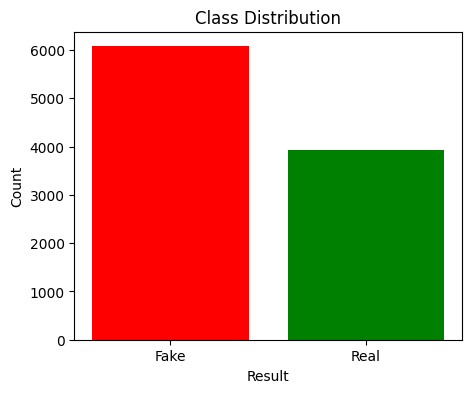

In [ ]:
# Count the number of instances in each class
class_counts = sub_text_img['2_way_label'].value_counts()

# Plot the class distribution
beingsaved = plt.figure(figsize=(5, 4))
colors = ['red', 'green']
plt.bar(['Fake', 'Real'], class_counts.values, color=colors)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Observation: The chosen data sample is imbalanced. Therefore, data sampling techniques will be applied.

In [ ]:
#checking for missing values
sub_text_img.isna().sum()

clean_title        0
domain          2983
hasImage           0
id                 0
num_comments    2983
score              0
subreddit          0
title              0
upvote_ratio    2983
2_way_label        0
3_way_label        0
6_way_label        0
Image_Path         0
dtype: int64

Observation: The data columns used in this study does not have missing values. Therefore, no operations have been done to handle missing values.

**Basic statistics about text lengths**

In [ ]:
# Basic statistics about text lengths
visual_df = sub_text_img.copy()
visual_df['text_length'] = visual_df['title'].apply(lambda x: len(x.split()))
print("Text Length Statistics:")
print(visual_df['text_length'].describe())

Text Length Statistics:
count    10000.000000
mean         7.992400
std          5.986044
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         66.000000
Name: text_length, dtype: float64


**Distribution of Text Length**

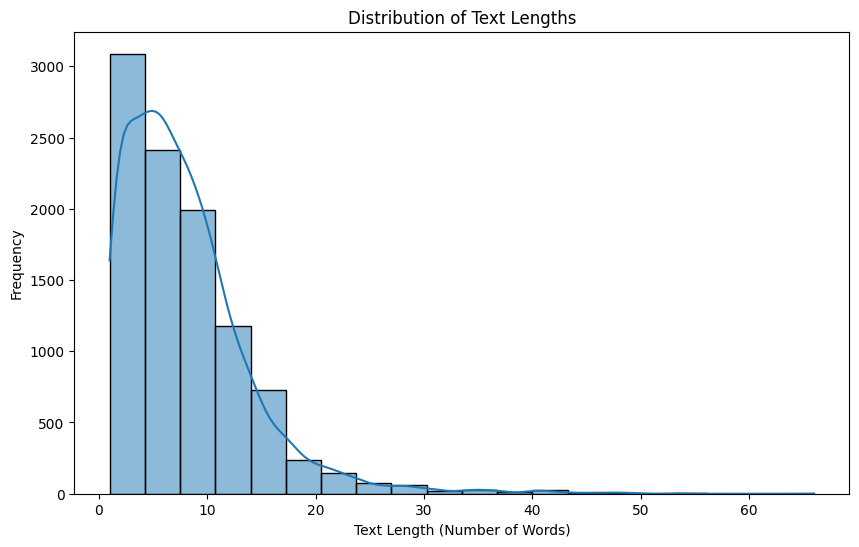

In [ ]:
# Plotting text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(visual_df['text_length'], bins=20, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

**Word Cloud for All Data**

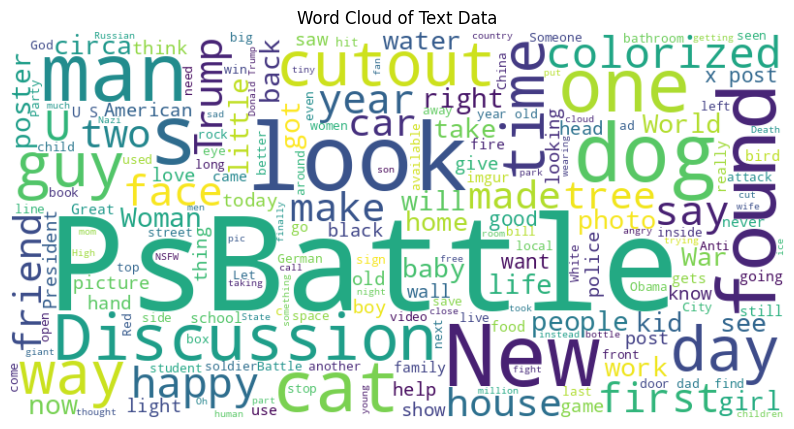

In [ ]:
# Generate a word cloud for the text data
all_text = ' '.join(visual_df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

**Word Cloud for Fake Vs Real Text**

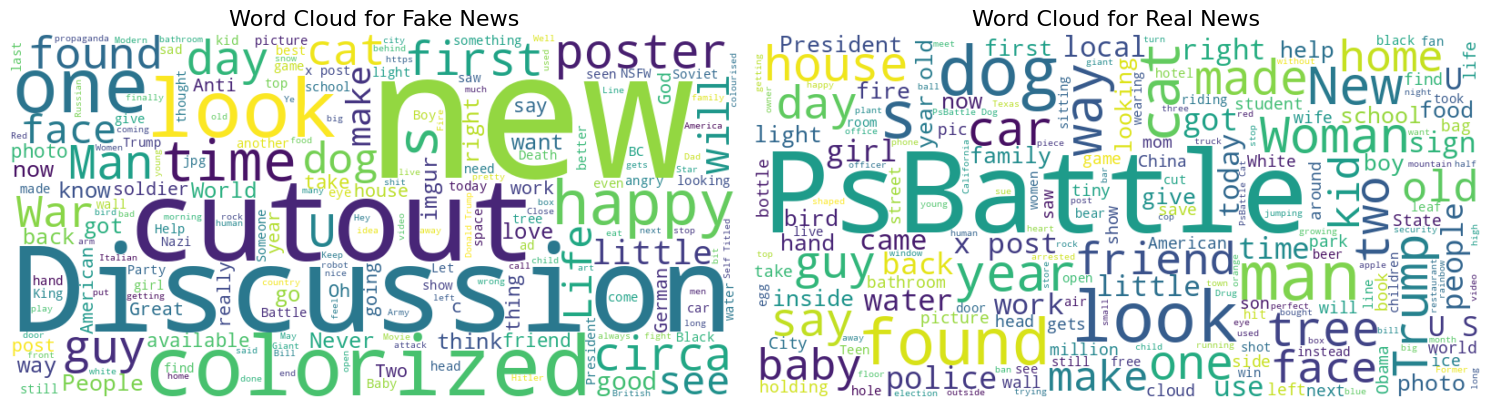

In [ ]:
label_map = {0: "Fake", 1: "Real"}

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

for i, (label, label_name) in enumerate(label_map.items()):

    text_data = visual_df[visual_df['2_way_label'] == label]['title'].values
    combined_text = " ".join(text_data)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Display the word cloud on the respective subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f"Word Cloud for {label_name} News", fontsize=16)
    axes[i].axis('off')

plt.tight_layout()

plt.show()

**Token distribution analysis**

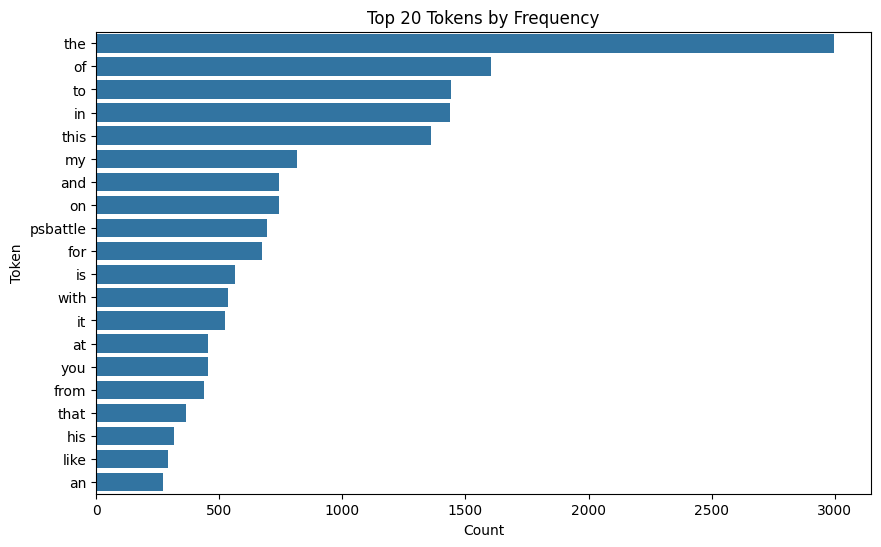

In [ ]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(visual_df['title'])
token_counts = np.array(X.sum(axis=0)).flatten()
tokens = vectorizer.get_feature_names_out()

# Plot token frequency distribution
token_freq = pd.DataFrame({'token': tokens, 'count': token_counts})
token_freq = token_freq.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='token', data=token_freq)
plt.title('Top 20 Tokens by Frequency')
plt.xlabel('Count')
plt.ylabel('Token')
plt.show()

**Sentence Length Distribution Analysis**

In [ ]:
# Function to calculate sentence length
def sentence_length(text):
    return len(text.split())

visual_df['sentence_length'] = visual_df['title'].apply(sentence_length)

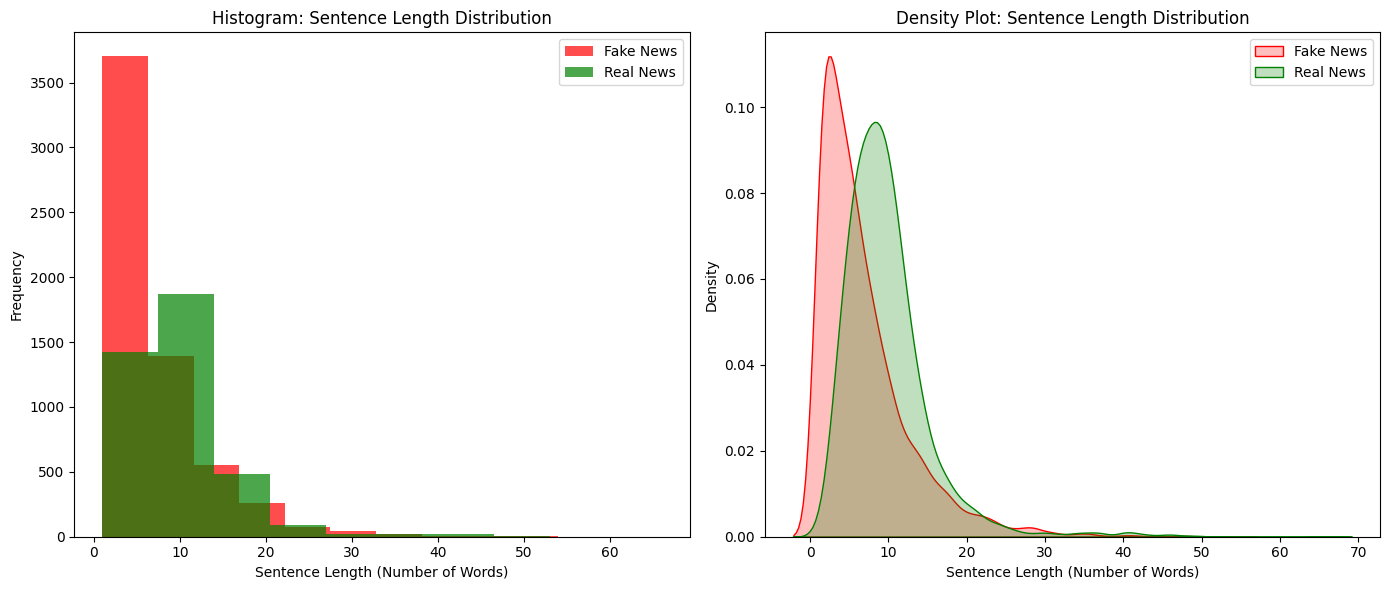

In [ ]:
# Separate the data into fake and real news
fake_news_lengths = visual_df[visual_df['2_way_label'] == 0]['sentence_length']
real_news_lengths = visual_df[visual_df['2_way_label']== 1]['sentence_length']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(fake_news_lengths, bins=10, alpha=0.7, label='Fake News', color='red')
axes[0].hist(real_news_lengths, bins=10, alpha=0.7, label='Real News', color='green')
axes[0].set_xlabel('Sentence Length (Number of Words)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram: Sentence Length Distribution')
axes[0].legend()

sns.kdeplot(fake_news_lengths, ax=axes[1], label='Fake News', color='red', fill=True)
sns.kdeplot(real_news_lengths, ax=axes[1], label='Real News', color='green',fill=True)
axes[1].set_xlabel('Sentence Length (Number of Words)')
axes[1].set_ylabel('Density')
axes[1].set_title('Density Plot: Sentence Length Distribution')
axes[1].legend()

plt.tight_layout()

plt.show()

**Sentiment Polarity for Fake and Real Text**

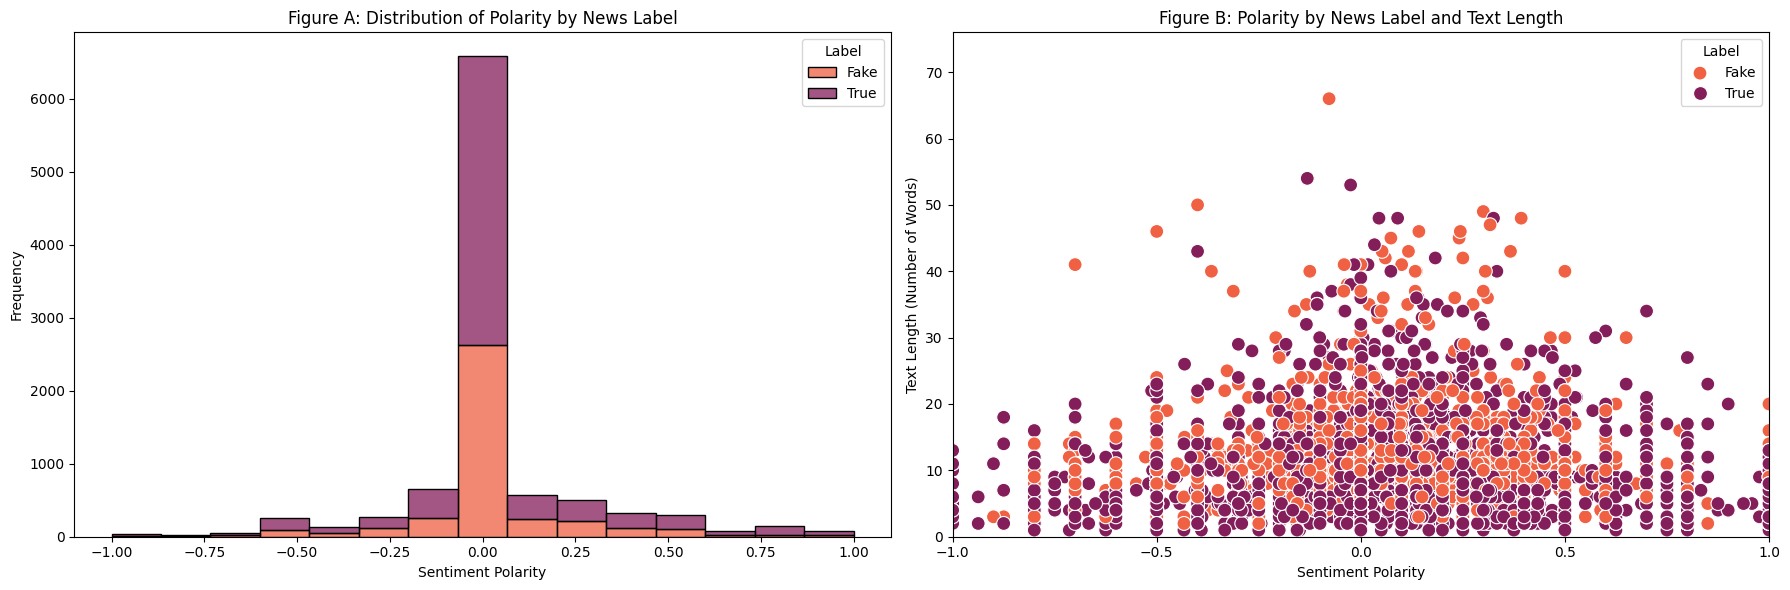

In [ ]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

visual_df['polarity'] = visual_df['title'].apply(get_sentiment)
visual_df['text_length'] = visual_df['title'].apply(lambda x: len(x.split()))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Figure A: Distribution of polarity with respect to the news label
sns.histplot(data=visual_df, x='polarity', hue='2_way_label', multiple='stack', palette='rocket', ax=axes[0])
axes[0].set_title('Figure A: Distribution of Polarity by News Label')
axes[0].set_xlabel('Sentiment Polarity')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Label', labels=['Fake', 'True'])

# Figure B: Distribution of polarity with respect to news label and text length
sns.scatterplot(data=visual_df, x='polarity', y='text_length', hue='2_way_label', palette='rocket', ax=axes[1], s=100)
axes[1].set_title('Figure B: Polarity by News Label and Text Length')
axes[1].set_xlabel('Sentiment Polarity')
axes[1].set_ylabel('Text Length (Number of Words)')
axes[1].set_xlim(-1, 1)
axes[1].set_ylim(0, visual_df['text_length'].max() + 10)
axes[1].set_xticks([-1,-0.5,0, 0.5, 1])
axes[1].legend(title='Label', labels=['Fake', 'True'])

plt.tight_layout()

plt.show()

**Visualisation of Sample Images for Fake and Real Class**

Sample Images from Class 0:


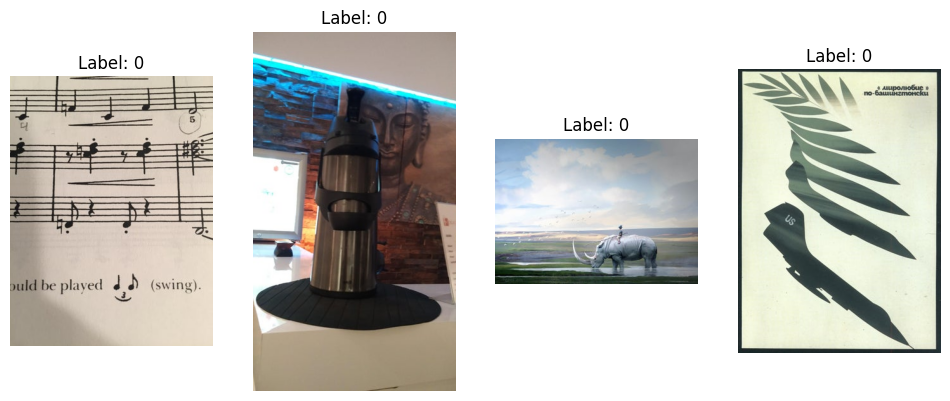

Sample Images from Class 1:


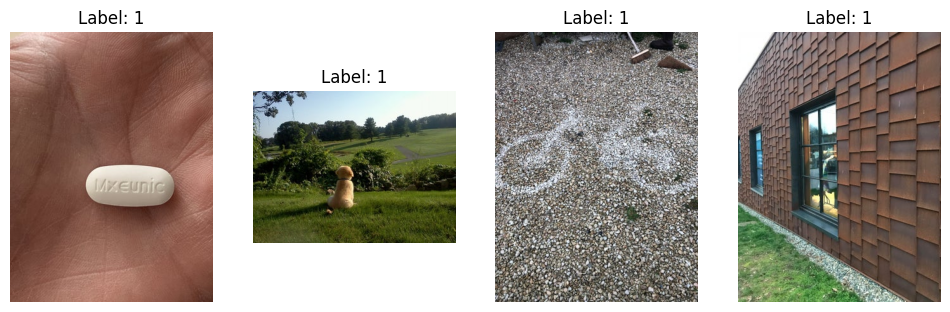

In [ ]:
# Display sample images from each class
def show_images(image_paths, labels, n=4):
    plt.figure(figsize=(12, 12))
    for i in range(n):
        image = Image.open(image_paths[i])
        plt.subplot(1, n, i+1)
        plt.imshow(image)
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

print("Sample Images from Class 0:")
show_images(visual_df[visual_df['2_way_label'] == 0]['Image_Path'].tolist(), visual_df[visual_df['2_way_label'] == 0]['2_way_label'].tolist())

print("Sample Images from Class 1:")
show_images(visual_df[visual_df['2_way_label'] == 1]['Image_Path'].tolist(), visual_df[visual_df['2_way_label'] == 1]['2_way_label'].tolist())

**Splitting Data**

In [ ]:
train_df, test_df = train_test_split(sub_text_img, test_size=0.20)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (8000, 13)
test shape:  (2000, 13)


Removed unwanted variables due to space usage

In [ ]:
import gc

del sub_text_img
del merged_text_img_data
del image_paths_df
del img_txt_data_df
gc.collect()

171

# Experiments

# Experiments with Scalable Solutions

---



# 1. CLIP based Model

## Early Fusion

Load the models

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

Create the dataset pipeline

In [ ]:
class FakeNewsDataset(Dataset):
    def __init__(self, texts, images, labels, preprocess):
        self.texts = texts
        self.images = images
        self.labels = labels
        self.preprocess = preprocess

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx])
        image = self.preprocess(image).unsqueeze(0).to(device)
        text = clip.tokenize(self.texts[idx])
        label = self.labels[idx]
        return text, image, label

Apply sampler technique to balance the data

In [ ]:
# Encode labels to get class indices
class_counts = train_df['2_way_label'].value_counts()
class_weights = {label: 1/count for label, count in class_counts.items()}

label_encoder = LabelEncoder()
train_df['label_encoded'] = label_encoder.fit_transform(train_df['2_way_label'])

# Compute sample weights
sample_weights = train_df['2_way_label'].map(class_weights).values
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

Implement the clip based model with early fusion.

In [ ]:
class ClipBasedModel(nn.Module):
    def __init__(self, clip_model, hidden_dim):
        super(ClipBasedModel, self).__init__()
        self.clip_model = clip_model
        self.fc1 = nn.Linear(hidden_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)
        self.float()

    def forward(self, image, text):
        with torch.no_grad():
            image_features = self.clip_model.encode_image(image)
            text_features = self.clip_model.encode_text(text)
        combined_features = torch.cat((image_features, text_features), dim=1)

        x = torch.relu(self.fc1(combined_features))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x


### Train and Evaluation

In [ ]:
#Function to train the model
def train_model(model, dataloader, criterion, optimizer, device, num_epochs=5):
    model.train()
    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for text_inputs, image_inputs, labels in dataloader:
            text_inputs = text_inputs.squeeze(1).to(device)
            image_inputs = image_inputs.squeeze(1).to(device)
            labels = labels.to(device).float()

            outputs = model(image_inputs,text_inputs).squeeze()
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(dataloader)
        train_losses.append(epoch_loss)
        print(f"learning_rate: {lr}, batch_size: {batch_size}")
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    return train_losses

In [ ]:
#Function to validate the model
def evaluate_model(model, dataloader, criterion, device,accuracy = 0):
    model.eval()
    correct = 0
    total = 0
    val_losses = []
    all_preds = []
    all_labels = []
    with torch.no_grad():
        running_loss = 0.0
        for text_inputs, image_inputs, labels in dataloader:
            text_inputs = text_inputs.squeeze(1).to(device)
            image_inputs = image_inputs.squeeze(1).to(device)
            labels = labels.to(device).float()

            outputs = model(image_inputs,text_inputs).squeeze()
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        val_loss = running_loss / len(dataloader)
        val_losses.append(val_loss)

    accuracy = correct / total
    print(f'Validation Accuracy: {accuracy * 100:.2f}%')
    classification = classification_report(all_labels, all_preds, target_names=['Fake', 'Real'])
    return val_losses, accuracy, classification

**Hyper-parameter Tunning**

In [ ]:
param_grid = {
    'learning_rate': [1e-3, 1e-4],
    'batch_size': [8, 16],
    'hidden_dim': [1024]
}

texts = train_df['title'].values
images = train_df['Image_Path'].values
labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = FakeNewsDataset(texts, images, labels, preprocess)
val_dataset = FakeNewsDataset(test_texts, test_images, test_labels, preprocess)

best_accuracy = 0
best_params = None

for lr, batch_size, hidden_dim in product(*param_grid.values()):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    clip_Model = ClipBasedModel(model, hidden_dim).to(device)
    criterion = nn.BCELoss()
    optimizer =  torch.optim.Adam(clip_Model.parameters(), lr=lr)

    if torch.cuda.is_available():
      clip_Model.cuda()

   # Training loop
    train_losses = train_model(clip_Model, train_loader, criterion, optimizer, device, num_epochs=5)

    # Validation
    val_losses, accuracy,classification = evaluate_model(clip_Model, val_loader, criterion, device)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classification_report = classification
        best_params = {'learning_rate': lr, 'batch_size': batch_size, 'loss_fn': criterion}
        best_train_losses = train_losses
        best_val_losses = val_losses

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Params: {best_params}")
print(f"Best Classification Report: {best_classification_report}")

learning_rate: 0.001, batch_size: 8
Epoch [1/5], Loss: 0.2297
learning_rate: 0.001, batch_size: 8
Epoch [2/5], Loss: 0.1335
learning_rate: 0.001, batch_size: 8
Epoch [3/5], Loss: 0.0947
learning_rate: 0.001, batch_size: 8
Epoch [4/5], Loss: 0.0514
learning_rate: 0.001, batch_size: 8
Epoch [5/5], Loss: 0.0360
Validation Accuracy: 88.70%
learning_rate: 0.001, batch_size: 16
Epoch [1/5], Loss: 0.2525
learning_rate: 0.001, batch_size: 16
Epoch [2/5], Loss: 0.1255
learning_rate: 0.001, batch_size: 16
Epoch [3/5], Loss: 0.0882
learning_rate: 0.001, batch_size: 16
Epoch [4/5], Loss: 0.0394
learning_rate: 0.001, batch_size: 16
Epoch [5/5], Loss: 0.0377
Validation Accuracy: 88.30%
learning_rate: 0.0001, batch_size: 8
Epoch [1/5], Loss: 0.3246
learning_rate: 0.0001, batch_size: 8
Epoch [2/5], Loss: 0.1728
learning_rate: 0.0001, batch_size: 8
Epoch [3/5], Loss: 0.1191
learning_rate: 0.0001, batch_size: 8
Epoch [4/5], Loss: 0.0733
learning_rate: 0.0001, batch_size: 8
Epoch [5/5], Loss: 0.0495
Vali

## Decision Level Fusion

In [ ]:
def custom_collate_fn(batch):
    # Unpack the batch
    inputs, labels = zip(*batch)

    # Process inputs
    text_input_ids = pad_sequence([x['input_ids'].squeeze(0) for x in inputs], batch_first=True, padding_value=processor.tokenizer.pad_token_id)
    text_attention_mask = pad_sequence([x['attention_mask'].squeeze(0) for x in inputs], batch_first=True, padding_value=0)
    image_pixel_values = torch.stack([x['pixel_values'].squeeze(0) for x in inputs])

    text_batch = {
        'input_ids': text_input_ids,
        'attention_mask': text_attention_mask
    }
    image_batch = {
        'pixel_values': image_pixel_values
    }

    # Process labels
    labels = torch.tensor(labels)

    return text_batch, image_batch, labels


**Implement the CLIP model with decision level fusion**

In [ ]:
class MultimodalDecisionLevelFusionModel(nn.Module):
    def __init__(self, clip_model, hidden_dim):
        super(MultimodalDecisionLevelFusionModel, self).__init__()
        self.clip_model = clip_model
        self.fc_text = nn.Linear(clip_model.text_projection.shape[0], hidden_dim)
        self.fc_image = nn.Linear(clip_model.visual.output_dim, hidden_dim)
        self.fc_combined = nn.Linear(hidden_dim * 2, 256)
        self.fc_final = nn.Linear(256, 1)


    def forward(self, image, text):
        with torch.no_grad():
            text_embeddings = self.clip_model.encode_image(image)
            image_embeddings = self.clip_model.encode_text(text)

        text_features = torch.relu(self.fc_text(text_embeddings.float()))
        image_features = torch.relu(self.fc_image(image_embeddings.float()))

        combined_features = torch.cat((text_features, image_features), dim=1)

        x = torch.relu(self.fc_combined(combined_features))
        x = torch.sigmoid(self.fc_final(x))

        return x


### Train and Evaluation

**Hyper-parameter tunning**

In [ ]:
param_grid = {
    'learning_rate': [ 1e-3, 1e-4, 1e-5],
    'batch_size': [8, 16],
    'hidden_dim': [512]
}


texts = train_df['title'].values
images = train_df['Image_Path'].values
labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = FakeNewsDataset(texts, images, labels, preprocess)
val_dataset = FakeNewsDataset(test_texts, test_images, test_labels, preprocess)

best_accuracy = 0
best_params = None

for lr, batch_size, hidden_dim in product(*param_grid.values()):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    late_fusion_clip_Model = MultimodalDecisionLevelFusionModel(model, hidden_dim).to(device)
    criterion = nn.BCELoss()
    optimizer =  torch.optim.Adam(model.parameters(), lr=lr)

    if torch.cuda.is_available():
      bert_Model.cuda()

   # Training loop
    train_losses = train_model(late_fusion_clip_Model, train_loader, criterion, optimizer, device, num_epochs=5)

    # Validation
    val_losses, accuracy,classification = evaluate_model(late_fusion_clip_Model, val_loader, criterion, device)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classification_report = classification
        best_params = {'learning_rate': lr, 'batch_size': batch_size, 'loss_fn': criterion, 'hidden_dim': hidden_dim}
        best_train_losses = train_losses
        best_val_losses = val_losses

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Params: {best_params}")
print(f"Best Classification Report: {best_classification_report}")


learning_rate: 0.001, batch_size: 8
Epoch [1/5], Loss: 0.6947
learning_rate: 0.001, batch_size: 8
Epoch [2/5], Loss: 0.6947
learning_rate: 0.001, batch_size: 8
Epoch [3/5], Loss: 0.6947
learning_rate: 0.001, batch_size: 8
Epoch [4/5], Loss: 0.6947
learning_rate: 0.001, batch_size: 8
Epoch [5/5], Loss: 0.6947
Validation Accuracy: 44.60%
learning_rate: 0.001, batch_size: 16
Epoch [1/5], Loss: 0.7033
learning_rate: 0.001, batch_size: 16
Epoch [2/5], Loss: 0.7033
learning_rate: 0.001, batch_size: 16
Epoch [3/5], Loss: 0.7033
learning_rate: 0.001, batch_size: 16
Epoch [4/5], Loss: 0.7033
learning_rate: 0.001, batch_size: 16
Epoch [5/5], Loss: 0.7033
Validation Accuracy: 38.90%
learning_rate: 0.0001, batch_size: 8
Epoch [1/5], Loss: 0.7061
learning_rate: 0.0001, batch_size: 8
Epoch [2/5], Loss: 0.7061
learning_rate: 0.0001, batch_size: 8
Epoch [3/5], Loss: 0.7061
learning_rate: 0.0001, batch_size: 8
Epoch [4/5], Loss: 0.7061
learning_rate: 0.0001, batch_size: 8
Epoch [5/5], Loss: 0.7061
Vali

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


learning_rate: 0.0001, batch_size: 16
Epoch [1/5], Loss: 0.6892
learning_rate: 0.0001, batch_size: 16
Epoch [2/5], Loss: 0.6892
learning_rate: 0.0001, batch_size: 16
Epoch [3/5], Loss: 0.6892
learning_rate: 0.0001, batch_size: 16
Epoch [4/5], Loss: 0.6892
learning_rate: 0.0001, batch_size: 16
Epoch [5/5], Loss: 0.6892
Validation Accuracy: 56.80%
learning_rate: 1e-05, batch_size: 8
Epoch [1/5], Loss: 0.6953
learning_rate: 1e-05, batch_size: 8
Epoch [2/5], Loss: 0.6953
learning_rate: 1e-05, batch_size: 8
Epoch [3/5], Loss: 0.6953
learning_rate: 1e-05, batch_size: 8
Epoch [4/5], Loss: 0.6953
learning_rate: 1e-05, batch_size: 8
Epoch [5/5], Loss: 0.6953
Validation Accuracy: 45.40%
learning_rate: 1e-05, batch_size: 16
Epoch [1/5], Loss: 0.6894
learning_rate: 1e-05, batch_size: 16
Epoch [2/5], Loss: 0.6894
learning_rate: 1e-05, batch_size: 16
Epoch [3/5], Loss: 0.6894
learning_rate: 1e-05, batch_size: 16
Epoch [4/5], Loss: 0.6894
learning_rate: 1e-05, batch_size: 16
Epoch [5/5], Loss: 0.6894

In [ ]:
import gc

del bert_Model
del clip_Model
gc.collect()

2644

# 2. BLIP +CLIP Model

**Including Image-Text Similarity Component**

## Early Fusion

**Load the models.**

In [ ]:
from transformers import BlipProcessor, BlipForImageTextRetrieval


device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

processor = BlipProcessor.from_pretrained("Salesforce/blip-itm-base-coco")
blip_model = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/456 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/895M [00:00<?, ?B/s]

**Create the dataset pipeline**

In [ ]:
class FakeNewsDataset(Dataset):
    def __init__(self, texts, images, labels, preprocess, image_processor):
        self.texts = texts
        self.images = images
        self.labels = labels
        self.preprocess = preprocess
        self.image_processor = image_processor

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx])

        preprocessed_image = self.preprocess(image).unsqueeze(0).to(device)
        text = clip.tokenize(self.texts[idx])
        label = self.labels[idx]

        encoding = self.image_processor(images=image, text=self.texts[idx], padding="max_length", return_tensors="pt")
        # remove batch dimension

        encoding = {k:v.squeeze() for k,v in encoding.items()}

        # image = torch.tensor(image).permute(2, 0, 1).float()
        return text, preprocessed_image, label, encoding

**Implement the CLIP based model with early fusion**

In [ ]:
class ClipBasedModel(nn.Module):
    def __init__(self, clip_model):
        super(ClipBasedModel, self).__init__()
        self.clip_model = clip_model
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)

    def forward(self, image, text):
        with torch.no_grad():
            image_features = self.clip_model.encode_image(image)
            text_features = self.clip_model.encode_text(text)
        combined_features = torch.cat((image_features, text_features), dim=1)

        x = torch.relu(self.fc1(combined_features))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x


In [ ]:
class BlipCombinedModel(nn.Module):
    def __init__(self, blip_model,clip_model):
        super(BlipCombinedModel,self).__init__()
        self.clip_model = ClipBasedModel(clip_model)
        self.blip_model = blip_model
        self.fc1 = nn.Linear(769 , 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)
        self.float()

    def forward(self, image, text, encodings):
        with torch.no_grad():
            text_img_output = self.clip_model(image, text)
            blip_model_output = self.blip_model(**encodings)
        combined_features = torch.cat((text_img_output, blip_model_output.last_hidden_state[:, 0, :]), dim=1)

        x = torch.relu(self.fc1(combined_features))
        x = torch.relu(self.fc2(x))
        # x_combined = torch.cat((x, blip_outputs.last_hidden_state[:, 0, :]), dim=1)

        x = torch.sigmoid(self.fc3(x))

        return x


### Train and Evaluation

In [ ]:
#Function to train the model
def train_model(model, dataloader, criterion, optimizer, device, num_epochs=5):
    model.train()
    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for text_inputs, image_inputs, labels,encoding in dataloader:
            text_inputs = text_inputs.squeeze(1).to(device)
            image_inputs = image_inputs.squeeze(1).to(device)
            labels = labels.to(device).float()
            encoding = {k: v.to(device) for k, v in encoding.items()}

            outputs = model(image_inputs,text_inputs, encoding)
            loss = criterion(outputs, labels.unsqueeze(1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(dataloader)
        train_losses.append(epoch_loss)
        print(f"learning_rate: {lr}, batch_size: {batch_size}")
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    return train_losses

In [ ]:
#Function to validate the model
def evaluate_model(model, dataloader, criterion, device,accuracy = 0):
    model.eval()
    correct = 0
    total = 0
    val_losses = []
    all_preds = []
    all_labels = []
    with torch.no_grad():
        running_loss = 0.0
        for text_inputs, image_inputs, labels, encoding in dataloader:
            text_inputs = text_inputs.squeeze(1).to(device)
            image_inputs = image_inputs.squeeze(1).to(device)
            labels = labels.to(device).float()
            encoding = {k: v.to(device) for k, v in encoding.items()}

            outputs = model(image_inputs,text_inputs,encoding).squeeze()
            loss = criterion(outputs,  labels)
            running_loss += loss.item()

            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        val_loss = running_loss / len(dataloader)
        val_losses.append(val_loss)

    accuracy = correct / total
    print(f'Validation Accuracy: {accuracy * 100:.2f}%')
    classification = classification_report(all_labels, all_preds, target_names=['Fake', 'Real'])
    return val_losses, accuracy, classification

**Hyper-paramter tunning**

In [ ]:

param_grid = {
    'learning_rate': [1e-3,1e-4,1e-5],
    'batch_size': [8]
}

texts = train_df['title'].values
images = train_df['Image_Path'].values
labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = FakeNewsDataset(texts, images, labels, preprocess, processor)
val_dataset = FakeNewsDataset(test_texts, test_images, test_labels, preprocess,processor)

best_accuracy = 0
best_params = None

for lr, batch_size in product(*param_grid.values()):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    clip_Model = BlipCombinedModel(blip_model,model).to(device)
    criterion = nn.BCELoss()
    optimizer =  torch.optim.Adam(clip_Model.parameters(), lr=lr)

    train_losses = train_model(clip_Model, train_loader, criterion, optimizer, device, num_epochs=5)

    val_losses, accuracy,classification = evaluate_model(clip_Model, val_loader, criterion, device)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classification_report = classification
        best_params = {'learning_rate': lr, 'batch_size': batch_size, 'loss_fn': criterion}
        best_train_losses = train_losses
        best_val_losses = val_losses

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Params: {best_params}")
print(f"Best Classification Report: {best_classification_report}")

learning_rate: 0.001, batch_size: 8
Epoch [1/5], Loss: 0.5077
learning_rate: 0.001, batch_size: 8
Epoch [2/5], Loss: 0.4212
learning_rate: 0.001, batch_size: 8
Epoch [3/5], Loss: 0.3753
learning_rate: 0.001, batch_size: 8
Epoch [4/5], Loss: 0.3093
learning_rate: 0.001, batch_size: 8
Epoch [5/5], Loss: 0.2392
Validation Accuracy: 78.80%
learning_rate: 0.0001, batch_size: 8
Epoch [1/5], Loss: 0.5430
learning_rate: 0.0001, batch_size: 8
Epoch [2/5], Loss: 0.4340
learning_rate: 0.0001, batch_size: 8
Epoch [3/5], Loss: 0.3838
learning_rate: 0.0001, batch_size: 8
Epoch [4/5], Loss: 0.3236
learning_rate: 0.0001, batch_size: 8
Epoch [5/5], Loss: 0.2492
Validation Accuracy: 79.70%
learning_rate: 1e-05, batch_size: 8
Epoch [1/5], Loss: 0.6582
learning_rate: 1e-05, batch_size: 8
Epoch [2/5], Loss: 0.6040
learning_rate: 1e-05, batch_size: 8
Epoch [3/5], Loss: 0.5441
learning_rate: 1e-05, batch_size: 8
Epoch [4/5], Loss: 0.5027
learning_rate: 1e-05, batch_size: 8
Epoch [5/5], Loss: 0.4779
Validatio

## Decision Level Fusion

**Load the models**

In [ ]:
from transformers import BlipProcessor, BlipForImageTextRetrieval


device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

processor = BlipProcessor.from_pretrained("Salesforce/blip-itm-base-coco")
blip_model = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")

100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 84.8MiB/s]


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/456 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/895M [00:00<?, ?B/s]

**Implement the dataset pipeline**

In [ ]:
class FakeNewsDataset(Dataset):
    def __init__(self, texts, images, labels, preprocess, image_processor):
        self.texts = texts
        self.images = images
        self.labels = labels
        self.preprocess = preprocess
        self.image_processor = image_processor

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):

          try:
            image = Image.open(self.images[idx])

            preprocessed_image = self.preprocess(image).unsqueeze(0).to(device)
            text = clip.tokenize(self.texts[idx])
            label = self.labels[idx]

            encoding = self.image_processor(images=image, text=self.texts[idx], padding="max_length", return_tensors="pt")

            encoding = {k:v.squeeze() for k,v in encoding.items()}

            return text, preprocessed_image, label, encoding
          except IndexError:
            raise
          except (IOError, UnidentifiedImageError, SyntaxError) as e:
                print(f"Cannot open image: {self.images[idx]}, Error: {e}")
                idx += 1
                if idx >= len(self):
                  raise IndexError("No more valid data points available.")
                return self.__getitem__(idx)

**Implement the late fusion with CLIP + BLIP based model**

In [ ]:
class BlipLateFusionCombinedModel(nn.Module):
    def __init__(self, blip_model,clip_model):
        super(BlipLateFusionCombinedModel,self).__init__()
        self.clip_model = clip_model
        self.blip_model = blip_model
        self.fc1 = nn.Linear(1024 , 512)
        self.fc2 = nn.Linear(768, 256)
        self.fc3 = nn.Linear(256, 1)
        self.float()

    def forward(self, image, text, encodings):
        with torch.no_grad():
            image_features = self.clip_model.encode_image(image)
            text_features = self.clip_model.encode_text(text)
            blip_model_output = self.blip_model(**encodings)

        clip_combined_features = torch.cat((image_features, text_features), dim=1)
        clip_output = torch.relu(self.fc1(clip_combined_features))

        x = torch.relu(self.fc2(blip_model_output.last_hidden_state[:, 0, :]))
        combined_features = torch.cat((clip_output, x), dim=1)

        x = torch.relu(self.fc2(combined_features))

        x = torch.sigmoid(self.fc3(x))

        return x


### Train and Evaluation

In [ ]:
#Function to train the model
def train_model(model, dataloader, criterion, optimizer, device, num_epochs=5):
    model.train()
    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for text_inputs, image_inputs, labels,encoding in dataloader:
            text_inputs = text_inputs.squeeze(1).to(device)
            image_inputs = image_inputs.squeeze(1).to(device)
            labels = labels.to(device).float()
            encoding = {k: v.to(device) for k, v in encoding.items()}

            outputs = model(image_inputs,text_inputs, encoding)
            loss = criterion(outputs, labels.unsqueeze(1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(dataloader)
        train_losses.append(epoch_loss)
        print(f"learning_rate: {lr}, batch_size: {batch_size}")
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    return train_losses

In [ ]:
#Function to validate the model
def evaluate_model(model, dataloader, criterion, device,accuracy = 0):
    model.eval()
    correct = 0
    total = 0
    val_losses = []
    all_preds = []
    all_labels = []
    with torch.no_grad():
        running_loss = 0.0
        for text_inputs, image_inputs, labels, encoding in dataloader:
            text_inputs = text_inputs.squeeze(1).to(device)
            image_inputs = image_inputs.squeeze(1).to(device)
            labels = labels.to(device).float()
            encoding = {k: v.to(device) for k, v in encoding.items()}

            outputs = model(image_inputs,text_inputs,encoding).squeeze()
            loss = criterion(outputs,  labels)
            running_loss += loss.item()

            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        val_loss = running_loss / len(dataloader)
        val_losses.append(val_loss)

    accuracy = correct / total
    print(f'Validation Accuracy: {accuracy * 100:.2f}%')
    classification = classification_report(all_labels, all_preds, target_names=['Fake', 'Real'])
    return val_losses, accuracy, classification

**Hyperparamter tunning**

In [ ]:

param_grid = {
    'learning_rate': [1e-3, 1e-4,1e-5],
    'batch_size': [4,8]
}


texts = train_df['title'].values
images = train_df['Image_Path'].values
labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = FakeNewsDataset(texts, images, labels, preprocess, processor)
val_dataset = FakeNewsDataset(test_texts, test_images, test_labels, preprocess,processor)

best_accuracy = 0
best_params = None

for lr, batch_size in product(*param_grid.values()):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    blip_Late_Model = BlipLateFusionCombinedModel(blip_model,model).to(device)

    if torch.cuda.is_available():
      blip_Late_Model.cuda()

    criterion = nn.BCELoss()
    optimizer =  torch.optim.Adam(blip_Late_Model.parameters(), lr=lr)

   # Training loop
    train_losses = train_model(blip_Late_Model, train_loader, criterion, optimizer, device, num_epochs=5)

    # Validation
    val_losses, accuracy,classification = evaluate_model(blip_Late_Model, val_loader, criterion, device)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classification_report = classification
        best_params = {'learning_rate': lr, 'batch_size': batch_size, 'loss_fn': criterion}
        best_train_losses = train_losses
        best_val_losses = val_losses

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Params: {best_params}")
print(f"Best Classification Report: {best_classification_report}")



learning_rate: 0.001, batch_size: 4
Epoch [1/5], Loss: 0.2966
learning_rate: 0.001, batch_size: 4
Epoch [2/5], Loss: 0.1654
learning_rate: 0.001, batch_size: 4
Epoch [3/5], Loss: 0.0922
learning_rate: 0.001, batch_size: 4
Epoch [4/5], Loss: 0.0411
learning_rate: 0.001, batch_size: 4
Epoch [5/5], Loss: 0.0222
Validation Accuracy: 87.60%
learning_rate: 0.001, batch_size: 8
Epoch [1/5], Loss: 0.2950
learning_rate: 0.001, batch_size: 8
Epoch [2/5], Loss: 0.1600
learning_rate: 0.001, batch_size: 8
Epoch [3/5], Loss: 0.0800
learning_rate: 0.001, batch_size: 8
Epoch [4/5], Loss: 0.0352
learning_rate: 0.001, batch_size: 8
Epoch [5/5], Loss: 0.0308
Validation Accuracy: 88.20%
learning_rate: 0.0001, batch_size: 4
Epoch [1/5], Loss: 0.3300
learning_rate: 0.0001, batch_size: 4
Epoch [2/5], Loss: 0.1930
learning_rate: 0.0001, batch_size: 4
Epoch [3/5], Loss: 0.1263
learning_rate: 0.0001, batch_size: 4
Epoch [4/5], Loss: 0.0640
learning_rate: 0.0001, batch_size: 4
Epoch [5/5], Loss: 0.0213
Validatio

Removed unwanted variables due to high space usage

In [ ]:
import gc

del blip_model
del clip_Model
del train_loader
del val_loader
del val_dataset
del train_dataset
gc.collect()

518

# ✅ Proposed Model for Fake Detection
---

**The following cells contain the final proposed solution for the fake text and image detection.**

## Hybrid Fusion

**Load the models**

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 123MiB/s]


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

**Create the dataset pipeline for Fakeddit dataset**

In [ ]:
class FakeNewsDataset(Dataset):
    def __init__(self, texts, images, labels, preprocess, image_processor):
        self.texts = texts
        self.images = images
        self.labels = labels
        self.preprocess = preprocess
        self.image_processor = image_processor

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
          try:
            image = Image.open(self.images[idx])

            preprocessed_image = self.preprocess(image).unsqueeze(0).to(device)
            text = clip.tokenize(self.texts[idx])
            label = self.labels[idx]

            encoding = self.image_processor(images=image, text=self.texts[idx], padding="max_length", return_tensors="pt")

            encoding = {k:v.squeeze() for k,v in encoding.items()}

            return text, preprocessed_image, label, encoding
          except IndexError:
            raise
          except (IOError, UnidentifiedImageError, SyntaxError) as e:
                print(f"Cannot open image: {self.images[idx]}, Error: {e}")
                idx += 1
                if idx >= len(self):
                  raise IndexError("No more valid data points available.")
                return self.__getitem__(idx)

**Applying weighted random sampler to balance the dataset.**

In [ ]:
# Encode labels to get class indices
class_counts = train_df['2_way_label'].value_counts()
class_weights = {label: 1/count for label, count in class_counts.items()}

label_encoder = LabelEncoder()
train_df['label_encoded'] = label_encoder.fit_transform(train_df['2_way_label'])

# Compute sample weights
sample_weights = train_df['2_way_label'].map(class_weights).values
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

**Proposed model implementation**

In [ ]:
class ClipAndBlipCombinedModel(nn.Module):
    def __init__(self, clip_model, blip_model):
        super(ClipAndBlipCombinedModel, self).__init__()
        self.clip_model = clip_model
        self.blip_model = blip_model
        self.fc1_clip = nn.Linear(1024, 512)
        self.fc2_clip = nn.Linear(512, 256)
        self.fc1_blip = nn.Linear(1024, 512)
        self.fc2_blip = nn.Linear(512, 256)
        self.fc3_clip = nn.Linear(256, 1)
        self.float()

    def forward(self, image, text, encodings):
        with torch.no_grad():
            image_features = self.clip_model.encode_image(image)
            text_features = self.clip_model.encode_text(text)
        combined_features = torch.cat((image_features, text_features), dim=1)

        x = torch.relu(self.fc1_clip(combined_features))
        x = torch.relu(self.fc2_clip(x))

        blip_outputs = self.blip_model(**encodings)

        x_combined = torch.cat((x, blip_outputs.last_hidden_state[:, 0, :]), dim=1)

        x  = self.fc1_blip(x_combined)
        x = self.fc2_blip(x)
        x = F.relu(x)

        x = torch.sigmoid(self.fc3_clip(x))

        return x


### Train and Evaluation

The following codes define the training and evaluation process of the model.

In [ ]:
def train_model(model, dataloader, criterion, optimizer, device, num_epochs=10):
    model.train()
    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for text_inputs, image_inputs, labels,encoding in dataloader:
            text_inputs = text_inputs.squeeze(1).to(device)
            image_inputs = image_inputs.squeeze(1).to(device)
            labels = labels.to(device).float()
            encoding = {k: v.to(device) for k, v in encoding.items()}

            outputs = model(image_inputs,text_inputs, encoding)
            loss = criterion(outputs, labels.unsqueeze(1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(dataloader)
        train_losses.append(epoch_loss)
        print(f"learning_rate: {lr}, batch_size: {batch_size}")
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    return train_losses

In [ ]:
def evaluate_model(model, dataloader, criterion, device,accuracy = 0):
    model.eval()
    correct = 0
    total = 0
    val_losses = []
    all_preds = []
    all_labels = []
    with torch.no_grad():
        running_loss = 0.0
        for text_inputs, image_inputs, labels, encoding in dataloader:
            text_inputs = text_inputs.squeeze(1).to(device)
            image_inputs = image_inputs.squeeze(1).to(device)
            labels = labels.to(device).float()
            encoding = {k: v.to(device) for k, v in encoding.items()}

            outputs = model(image_inputs,text_inputs,encoding).squeeze()
            loss = criterion(outputs,  labels)
            running_loss += loss.item()

            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        val_loss = running_loss / len(dataloader)
        val_losses.append(val_loss)

    accuracy = correct / total
    print(f'Validation Accuracy: {accuracy * 100:.2f}%')
    classification = classification_report(all_labels, all_preds, target_names=['Fake', 'Real'])
    return val_losses, accuracy, classification

In [ ]:
cd "/content/gdrive/My Drive/Colab Notebooks/research data/final_model"

/content/gdrive/My Drive/Colab Notebooks/research data/final_model


Initially the experiments were conducted using five thousnads samples of data. Then the number of samples were increased. The following code cell shows the hyper-paramter tunning using five thousands samples.

**Hyper-parameter Tunning**

In [ ]:

param_grid = {
    'learning_rate': [1e-3, 1e-4,1e-5],
    'batch_size': [4,8]
}


texts = train_df['title'].values
images = train_df['Image_Path'].values
labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = FakeNewsDataset(texts, images, labels, preprocess, processor)
val_dataset = FakeNewsDataset(test_texts, test_images, test_labels, preprocess,processor)

best_accuracy = 0
best_params = None

for lr, batch_size in product(*param_grid.values()):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    clip_Model = ClipAndBlipCombinedModel(model,blip_model).to(device)

    if torch.cuda.is_available():
      clip_Model.cuda()

    criterion = nn.BCELoss()
    optimizer =  torch.optim.Adam(clip_Model.parameters(), lr=lr)

   # Training loop
    train_losses = train_model(clip_Model, train_loader, criterion, optimizer, device, num_epochs=5)

    # Validation
    val_losses, accuracy,classification = evaluate_model(clip_Model, val_loader, criterion, device)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classification_report = classification
        best_params = {'learning_rate': lr, 'batch_size': batch_size, 'loss_fn': criterion}
        best_train_losses = train_losses
        best_val_losses = val_losses

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Params: {best_params}")
print(f"Best Classification Report: {best_classification_report}")



learning_rate: 0.001, batch_size: 4
Epoch [1/5], Loss: 0.3219
learning_rate: 0.001, batch_size: 4
Epoch [2/5], Loss: 0.2117
learning_rate: 0.001, batch_size: 4
Epoch [3/5], Loss: 0.1266
learning_rate: 0.001, batch_size: 4
Epoch [4/5], Loss: 0.0685
learning_rate: 0.001, batch_size: 4
Epoch [5/5], Loss: 0.0775
Validation Accuracy: 87.50%
learning_rate: 0.001, batch_size: 8
Epoch [1/5], Loss: 0.3089
learning_rate: 0.001, batch_size: 8
Epoch [2/5], Loss: 0.1732
learning_rate: 0.001, batch_size: 8
Epoch [3/5], Loss: 0.0982
learning_rate: 0.001, batch_size: 8
Epoch [4/5], Loss: 0.0576
learning_rate: 0.001, batch_size: 8
Epoch [5/5], Loss: 0.0331
Validation Accuracy: 87.70%
learning_rate: 0.0001, batch_size: 4
Epoch [1/5], Loss: 0.3149
learning_rate: 0.0001, batch_size: 4
Epoch [2/5], Loss: 0.1723
learning_rate: 0.0001, batch_size: 4
Epoch [3/5], Loss: 0.0851
learning_rate: 0.0001, batch_size: 4
Epoch [4/5], Loss: 0.0287
learning_rate: 0.0001, batch_size: 4
Epoch [5/5], Loss: 0.0175
Validatio

According to the above result, the best hyper-paramters for the above model was as follows.

> 'learning_rate': 0.0001, 'batch_size': 8, 'loss_fn': BCELoss()



**Visualise the Performance of the Three Best Models.**

After training CLIP + BLIP model with five thousands data it shows that the hybrid fusion technique was the better solution. The following graph shows the results for CLIP + BLIP model with different fusion techniques.

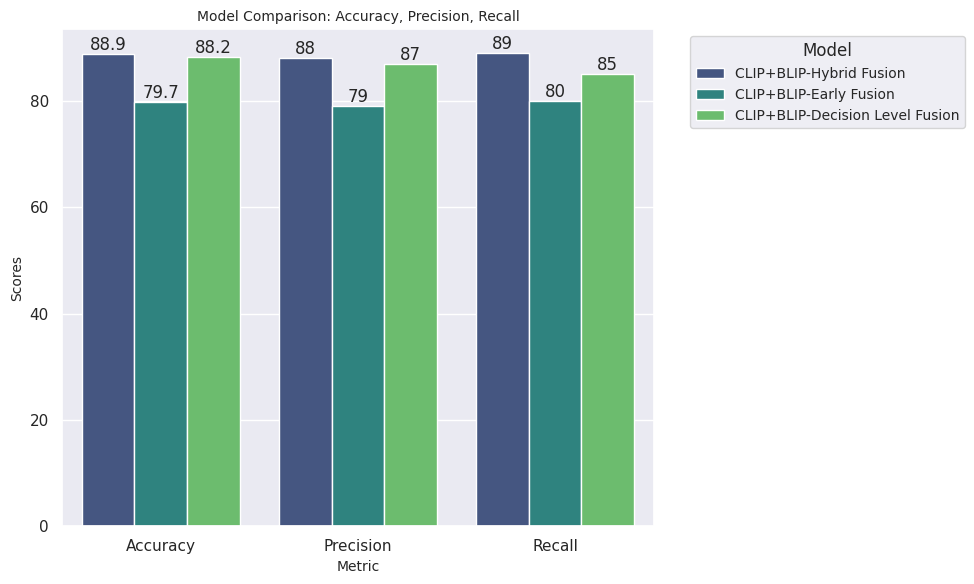

<Figure size 640x480 with 0 Axes>

In [ ]:

metrics = {
    'Model': ['CLIP+BLIP-Hybrid Fusion', 'CLIP+BLIP-Hybrid Fusion', 'CLIP+BLIP-Hybrid Fusion', 'CLIP+BLIP-Early Fusion', 'CLIP+BLIP-Early Fusion', 'CLIP+BLIP-Early Fusion','CLIP+BLIP-Decision Level Fusion', 'CLIP+BLIP-Decision Level Fusion', 'CLIP+BLIP-Decision Level Fusion'],
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Accuracy', 'Precision', 'Recall', 'Accuracy', 'Precision', 'Recall'],
    'Value': [88.9, 88,  89, 79.7, 79, 80, 88.2, 87,85]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(metrics)

# Set the visual style
sns.set(style="darkgrid")


# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Metric', y='Value', hue='Model', data=df, palette='viridis')

# Add title and labels
plt.title('Model Comparison: Accuracy, Precision, Recall', fontsize=10)
plt.xlabel('Metric', fontsize=10)
plt.ylabel('Scores', fontsize=10)

for i in ax.containers:
    ax.bar_label(i,)

plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})

plt.tight_layout()

plt.show()

The above graph visualise the best three models. Out of them CLIP+BLIP hybrid fusion models was the best model. Therefore, this model was trained increasing the number of samples and evaluated.

In [ ]:

param_grid = {
    'learning_rate': [1e-3, 1e-4,1e-5],
    'batch_size': [4,8]
}


texts = train_df['title'].values
images = train_df['Image_Path'].values
labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = FakeNewsDataset(texts, images, labels, preprocess, processor)
val_dataset = FakeNewsDataset(test_texts, test_images, test_labels, preprocess,processor)

best_accuracy = 0
best_params = None

for lr, batch_size in product(*param_grid.values()):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    clip_Model = ClipAndBlipCombinedModel(model,blip_model).to(device)

    if torch.cuda.is_available():
      clip_Model.cuda()

    criterion = nn.BCELoss()
    optimizer =  torch.optim.Adam(clip_Model.parameters(), lr=lr)

   # Training loop
    train_losses = train_model(clip_Model, train_loader, criterion, optimizer, device, num_epochs=5)

    # Validation
    val_losses, accuracy,classification = evaluate_model(clip_Model, val_loader, criterion, device)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classification_report = classification
        best_params = {'learning_rate': lr, 'batch_size': batch_size, 'loss_fn': criterion}
        best_train_losses = train_losses
        best_val_losses = val_losses

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Params: {best_params}")
print(f"Best Classification Report: {best_classification_report}")



learning_rate: 0.001, batch_size: 4
Epoch [1/5], Loss: 0.2987
learning_rate: 0.001, batch_size: 4
Epoch [2/5], Loss: 0.1817
learning_rate: 0.001, batch_size: 4
Epoch [3/5], Loss: 0.1258
learning_rate: 0.001, batch_size: 4
Epoch [4/5], Loss: 0.0683
learning_rate: 0.001, batch_size: 4
Epoch [5/5], Loss: 0.0560
Validation Accuracy: 90.80%
learning_rate: 0.001, batch_size: 8
Epoch [1/5], Loss: 0.2826
learning_rate: 0.001, batch_size: 8
Epoch [2/5], Loss: 0.1747
learning_rate: 0.001, batch_size: 8
Epoch [3/5], Loss: 0.1075
learning_rate: 0.001, batch_size: 8
Epoch [4/5], Loss: 0.0595
learning_rate: 0.001, batch_size: 8
Epoch [5/5], Loss: 0.0410
Validation Accuracy: 91.25%
learning_rate: 0.0001, batch_size: 4
Epoch [1/5], Loss: 0.2759
learning_rate: 0.0001, batch_size: 4
Epoch [2/5], Loss: 0.1671
learning_rate: 0.0001, batch_size: 4
Epoch [3/5], Loss: 0.0748
learning_rate: 0.0001, batch_size: 4
Epoch [4/5], Loss: 0.0279
learning_rate: 0.0001, batch_size: 4
Epoch [5/5], Loss: 0.0128
Validatio

The above result shows that when increase the data sample, the accuracy of the model was increased to 91.25%. The above results were obtained for 5 epcohs. Therefore, the number of epochs will be increased in the next code cell.

**Increasing No. of Epochs**

The number of epochs were increased and evaluated the model.

In [ ]:

param_grid = {
    'learning_rate': [1e-3],
    'batch_size': [8]
}

texts = train_df['title'].values
images = train_df['Image_Path'].values
labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = FakeNewsDataset(texts, images, labels, preprocess, processor)
val_dataset = FakeNewsDataset(test_texts, test_images, test_labels, preprocess,processor)

best_accuracy = 0
best_params = None

for lr, batch_size in product(*param_grid.values()):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,  sampler=sampler)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    clip_Model = ClipAndBlipCombinedModel(model,blip_model).to(device)

    if torch.cuda.is_available():
      clip_Model.cuda()

    criterion = nn.BCELoss()
    optimizer =  torch.optim.Adam(clip_Model.parameters(), lr=lr)

   # Training loop
    train_losses = train_model(clip_Model, train_loader, criterion, optimizer, device, num_epochs=10)

    # Validation
    val_losses, accuracy,classification = evaluate_model(clip_Model, val_loader, criterion, device)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classification_report = classification
        best_params = {'learning_rate': lr, 'batch_size': batch_size, 'loss_fn': criterion}
        best_train_losses = train_losses
        best_val_losses = val_losses
        torch.save(clip_Model.state_dict(), "CLIPAndBLIP.pth")

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Params: {best_params}")
print(f"Best Classification Report: {best_classification_report}")


learning_rate: 0.001, batch_size: 8
Epoch [1/10], Loss: 0.2521
learning_rate: 0.001, batch_size: 8
Epoch [2/10], Loss: 0.1616
learning_rate: 0.001, batch_size: 8
Epoch [3/10], Loss: 0.0947
learning_rate: 0.001, batch_size: 8
Epoch [4/10], Loss: 0.0743
learning_rate: 0.001, batch_size: 8
Epoch [5/10], Loss: 0.0489
learning_rate: 0.001, batch_size: 8
Epoch [6/10], Loss: 0.0452
learning_rate: 0.001, batch_size: 8
Epoch [7/10], Loss: 0.0222
learning_rate: 0.001, batch_size: 8
Epoch [8/10], Loss: 0.0340
learning_rate: 0.001, batch_size: 8
Epoch [9/10], Loss: 0.0252
learning_rate: 0.001, batch_size: 8
Epoch [10/10], Loss: 0.0214
Validation Accuracy: 91.25%
Best Accuracy: 0.9125
Best Params: {'learning_rate': 0.001, 'batch_size': 8, 'loss_fn': BCELoss()}
Best Classification Report:               precision    recall  f1-score   support

        Fake       0.94      0.92      0.93      1243
        Real       0.87      0.90      0.89       757

    accuracy                           0.91      2

Even though, the number of epochs were increased, above result shows that accuracy remains the same.

**The best model was saved and then tested using the test dataset given in Fakeddit dataset.**

### Evaluation using Test Dataset

**Load the test data**

In [ ]:
test_data_df = pd.read_csv(base_dir+'/multimodal_test_public.tsv', sep='\t')
test_data_df

author                                        clean_title  \
0             trustbytrust                                          stargazer   
1                      NaN                                               yeah   
2                 chaseoes  pd phoenix car thief gets instructions from yo...   
3                SFepicure  as trump accuses iran he has one problem his o...   
4      fragments_from_Work                                believers hezbollah   
...                    ...                                                ...   
59314           lazarus30d                  bicycle taxi drivers of new delhi   
59315              Sewblon  trump blows up gops formula for winning house ...   
59316       Lifewillbelife  napoleon returns from his exile on the island ...   
59317        LordCamembert   deep down he always wanted to be a ballet dancer   
59318            guanaco55  toddler miraculously survives story fall landi...   

        created_utc           domain  hasImage       id  \
0      1.425139e+09              NaN      True  cozywbv   
1      1.438173e+09              NaN      True  ctk61yw   
2      1.560492e+09        abc15.com      True   c0gl7r   
3      1.560606e+09      nytimes.com      True   c0xdqy   
4      1.515139e+09      i.imgur.com      True   7o9rmx   
...             ...              ...       ...      ...   
59314  1.352463e+09       flickr.com      True   12wreq   
59315  1.533888e+09     politico.com      True   9650zw   
59316  1.521720e+09        i.redd.it      True   86ax7x   
59317  1.366567e+09              NaN      True  c9jq15h   
59318  1.555027e+09  abc7chicago.com      True   bc71ul   

                                               image_url linked_submission_id  \
0                         http://i.imgur.com/BruWKDi.jpg               2xct9d   
1                         http://i.imgur.com/JRZT727.jpg               3f0h7o   
2      https://external-preview.redd.it/1A2_4VwgS8Qd2...                  NaN   
3      https://external-preview.redd.it/9BKRcgvaobpTo...                  NaN   
4      https://external-preview.redd.it/rbwXHncnjVh51...                  NaN   
...                                                  ...                  ...   
59314  https://external-preview.redd.it/mWhXZymnupI3a...                  NaN   
59315  https://external-preview.redd.it/1uLpjM1bd_vA-...                  NaN   
59316  https://preview.redd.it/fuzkuzxt0bn01.png?widt...                  NaN   
59317                     http://i.imgur.com/otCWbOt.jpg               1cssa3   
59318  https://external-preview.redd.it/v5mz1kqr7zVEu...                  NaN   

       num_comments  score          subreddit  \
0               NaN      3   psbattle_artwork   
1               NaN      2   psbattle_artwork   
2               2.0     16        nottheonion   
3               4.0     45        neutralnews   
4              40.0    285  propagandaposters   
...             ...    ...                ...   
59314           0.0      4                pic   
59315           1.0      2        neutralnews   
59316           0.0     45    fakehistoryporn   
59317           NaN    141   psbattle_artwork   
59318           2.0     21      upliftingnews   

                                                   title  upvote_ratio  \
0                                             stargazer            NaN   
1                                                   yeah           NaN   
2      PD: Phoenix car thief gets instructions from Y...          0.89   
3      As Trump Accuses Iran, He Has One Problem: His...          0.78   
4                           "Believers" - Hezbollah 2011          0.95   
...                                                  ...           ...   
59314                  Bicycle taxi drivers of New Delhi          0.64   
59315  Trump blows up GOP's formula for winning House...          0.58   
59316  Napoleon returns from his exile on the island ...          0.98   
59317   Deep down he always wanted t

In [ ]:
#Load the image paths file
test_image_paths_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/research data/testImageMapping.csv')
test_image_paths_df['File Name'] = test_image_paths_df['File Name'].str.replace('.jpg',"", regex=False)
test_image_paths_df.rename(columns={"File Location": "Image_Path", "File Name": "id"}, inplace=True)
test_image_paths_df

Image_Path       id
0     /content/gdrive/My Drive/Colab Notebooks/resea...   1t8xlt
1     /content/gdrive/My Drive/Colab Notebooks/resea...   1j28z3
2     /content/gdrive/My Drive/Colab Notebooks/resea...   8gyz5x
3     /content/gdrive/My Drive/Colab Notebooks/resea...   2l0v9r
4     /content/gdrive/My Drive/Colab Notebooks/resea...   bnik16
...                                                 ...      ...
7708  /content/gdrive/My Drive/Colab Notebooks/resea...   18xdny
7709  /content/gdrive/My Drive/Colab Notebooks/resea...   9kakm1
7710  /content/gdrive/My Drive/Colab Notebooks/resea...  c4hkhlv
7711  /content/gdrive/My Drive/Colab Notebooks/resea...   csb52p
7712  /content/gdrive/My Drive/Colab Notebooks/resea...   au2dyd

[7713 rows x 2 columns]

In [ ]:
display(test_image_paths_df.drop_duplicates())

test_data_df.drop_duplicates(subset="id",keep=False, inplace=True)

Image_Path       id
0     /content/gdrive/My Drive/Colab Notebooks/resea...   1t8xlt
1     /content/gdrive/My Drive/Colab Notebooks/resea...   1j28z3
2     /content/gdrive/My Drive/Colab Notebooks/resea...   8gyz5x
3     /content/gdrive/My Drive/Colab Notebooks/resea...   2l0v9r
4     /content/gdrive/My Drive/Colab Notebooks/resea...   bnik16
...                                                 ...      ...
7708  /content/gdrive/My Drive/Colab Notebooks/resea...   18xdny
7709  /content/gdrive/My Drive/Colab Notebooks/resea...   9kakm1
7710  /content/gdrive/My Drive/Colab Notebooks/resea...  c4hkhlv
7711  /content/gdrive/My Drive/Colab Notebooks/resea...   csb52p
7712  /content/gdrive/My Drive/Colab Notebooks/resea...   au2dyd

[7713 rows x 2 columns]

In [ ]:
# Merge the datasets on a common identifier ('id')
merged_data = pd.merge(test_data_df, test_image_paths_df,on="id")
merged_data

author                                        clean_title  \
0                benwolf77                                            come on   
1             lifeless2011                   ig nobel win for alpine goat man   
2     Overwhelming_Hipster                                      surprisedjpeg   
3                Deathwood                                        creepy deer   
4                FFourcade                this unexpectedly long table soccer   
...                    ...                                                ...   
7708     cheesy_breadstick                                       walking ewan   
7709               de-nnie  my grandparents during mid ties i guess on the...   
7710              GetJaded  occasionally ill randomly find dvds when stepp...   
7711       Fear-The-Patman  why is there a porter potty on the roof of my job   
7712            lazarus30d                  bicycle taxi drivers of new delhi   

       created_utc       domain  hasImage       id  \
0     1.512863e+09    i.redd.it      True   7iqceh   
1     1.474587e+09    bbc.co.uk      True   541v7x   
2     1.556503e+09    i.redd.it      True   biiv7g   
3     1.445333e+09  i.imgur.com      True   3pgxkc   
4     1.564494e+09    i.redd.it      True   cjruk1   
...            ...          ...       ...      ...   
7708  1.416541e+09          NaN      True  cm8n2bc   
7709  1.558184e+09    i.redd.it      True   bq3nsk   
7710  1.565348e+09    i.redd.it      True   co0q3a   
7711  1.552688e+09    i.redd.it      True   b1l038   
7712  1.352463e+09   flickr.com      True   12wreq   

                                              image_url linked_submission_id  \
0     https://preview.redd.it/8gfw2zvahz201.jpg?widt...                  NaN   
1     https://external-preview.redd.it/EdtVjaFghq0SG...                  NaN   
2     https://preview.redd.it/cj9g01ac04v21.jpg?widt...                  NaN   
3     https://external-preview.redd.it/27utBiydOgLNI...                  NaN   
4     https://preview.redd.it/gwbbl12g1gd31.jpg?widt...                  NaN   
...                                                 ...                  ...   
7708                     http://i.imgur.com/oXLkQxV.jpg               2mx9nv   
7709  https://preview.redd.it/g1c3rnbvuyy21.jpg?widt...                  NaN   
7710  https://preview.redd.it/2qas9nhllef31.jpg?widt...                  NaN   
7711  https://preview.redd.it/oojzsuurxcm21.jpg?widt...                  NaN   
7712  https://external-preview.redd.it/mWhXZymnupI3a...                  NaN   

      num_comments  score             subreddit  \
0              0.0      4            pareidolia   
1              3.0     45           nottheonion   
2              0.0      4            pareidolia   
3              7.0    405  misleadingthumbnails   
4              5.0     27     mildlyinteresting   
...            ...    ...                   ...   
7708           NaN     17      psbattle_artwork   
7709           7.0      4     mildlyinteresting   
7710           7.0     27     mildlyinteresting   
7711           8.0      5     mildlyinteresting   
7712           0.0      4                   pic   

                                                  title  upvote_ratio  \
0                                               Come On          0.76   
1                    Ig Nobel win for Alpine 'goat man'          0.94   
2                                        surprised.jpeg          0.76   
3                                           Creepy Deer          0.87   
4                   This unexpectedly long table soccer          0.90   
...                                                 ...           ...   
7708                                       Walking Ewan           NaN   
7709  My grandparents during mid 40-ties i guess on ...          0.65   
7710  Occasionally I'll randomly find DVDs when step...          0.83   
7711  Why is there a porter potty on the roof of my job          0.73   
7712                 

**Build the Image paths**

In [ ]:
merged_data.loc[:, 'Image_Path'] = merged_data['Image_Path'] + merged_data['id'] + ".jpg"
merged_data['Image_Path'][1]

'/content/gdrive/My Drive/Colab Notebooks/research data/Nalinika/test_images/541v7x.jpg'

**Preprocess the test data.**

In [ ]:
# Set seed to ensure consistency in language detection
DetectorFactory.seed = 0

# Function to remove timestamps (e.g., "12:34", "2021-06-21", "12:34:56")
def remove_timestamps(text):
    text = re.sub(r'\b\d{1,2}:\d{2}(?::\d{2})?\b', '', text)
    text = re.sub(r'\b\d{4}-\d{2}-\d{2}\b', '', text)
    return text

# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_emojis(text):
    emoji_pattern = re.compile(
        "[" u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

# Function to detect if the text is in English
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Combined function to clean text
def clean_text(text, max_length=77):
    text = remove_timestamps(text)
    text = remove_urls(text)
    text = remove_emojis(text)
    if len(text) > max_length:
      text = text[:max_length]
    return text.strip()


In [ ]:
merged_data['cleaned_text'] = merged_data['title'].apply(clean_text)
merged_data = merged_data[merged_data['cleaned_text'].apply(is_english)]

**Evaluate the model using the test dataset.**

Accuracy and confusion matrix has obtained using the saved model.

0.9062997136493796
Confusion Matrix
Axes(0.125,0.11;0.62x0.77)


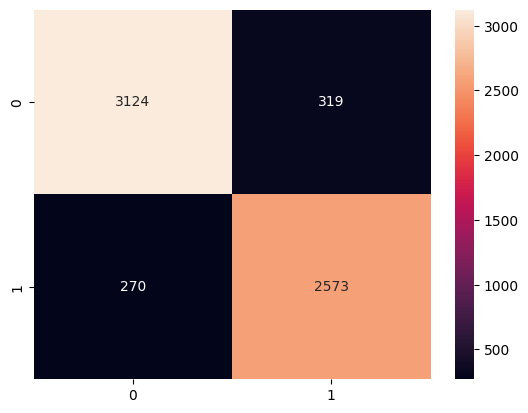

In [ ]:
test_texts = merged_data['cleaned_text'].values
test_images = merged_data['Image_Path'].values
test_labels = merged_data['2_way_label'].values

val_dataset = FakeNewsDataset(test_texts, test_images, test_labels, preprocess,processor)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False)

all_preds = []
all_labels = []
# Loading the saved model
saved_blip_model = ClipAndBlipCombinedModel(model,blip_model).to(device)
saved_blip_model.load_state_dict(torch.load("CLIPAndBLIP.pth",map_location=torch.device('cpu')))

for text_inputs, image_inputs, labels, encoding in val_loader:
    with torch.no_grad():

        if torch.cuda.is_available():
          torch.device('cpu')

        saved_blip_model.eval()

        text_inputs = text_inputs.squeeze(1).to(device)
        image_inputs = image_inputs.squeeze(1).to(device)
        labels = labels.to(device).float()
        encoding  = {k: v.to(device) for k, v in encoding.items()}

        outputs = saved_blip_model(image_inputs, text_inputs,encoding)

        predicted = (outputs > 0.5).float()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(accuracy_score(all_labels, all_preds))
print("Confusion Matrix")
matrix = confusion_matrix(all_labels, all_preds)
print(sns.heatmap(matrix,annot = True, fmt = "d"))


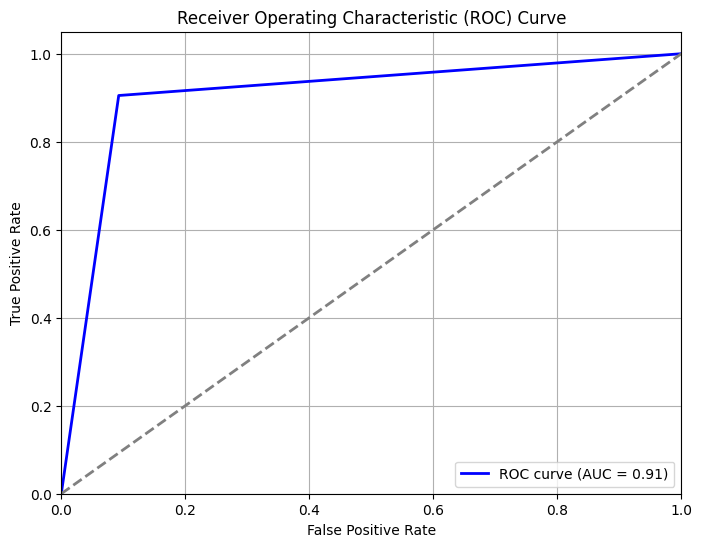

In [ ]:

fpr, tpr, thresholds = roc_curve(all_labels, all_preds)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()

**Test Data with Predicted and Actual Class**

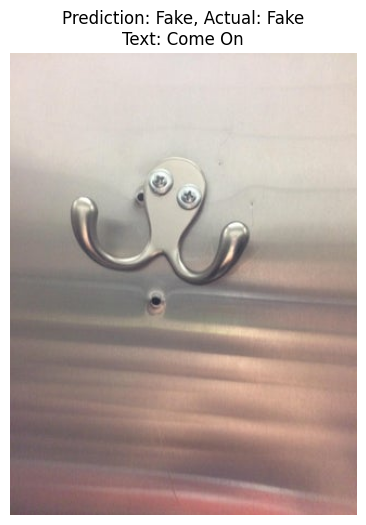

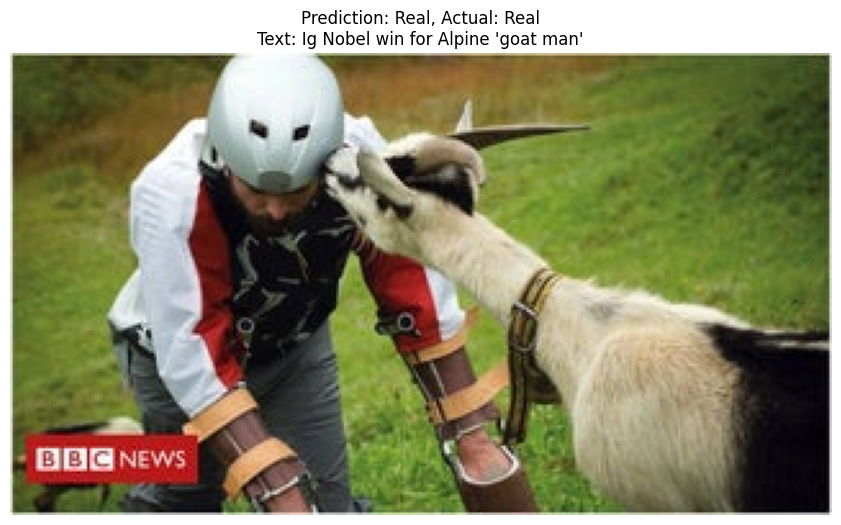

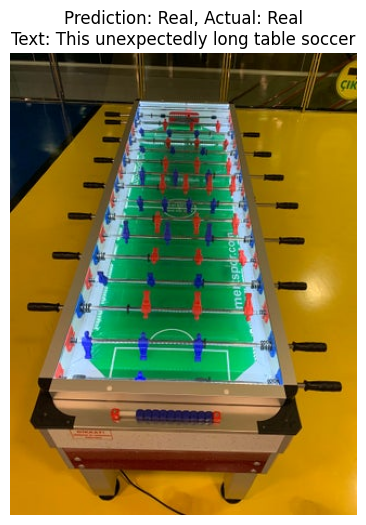

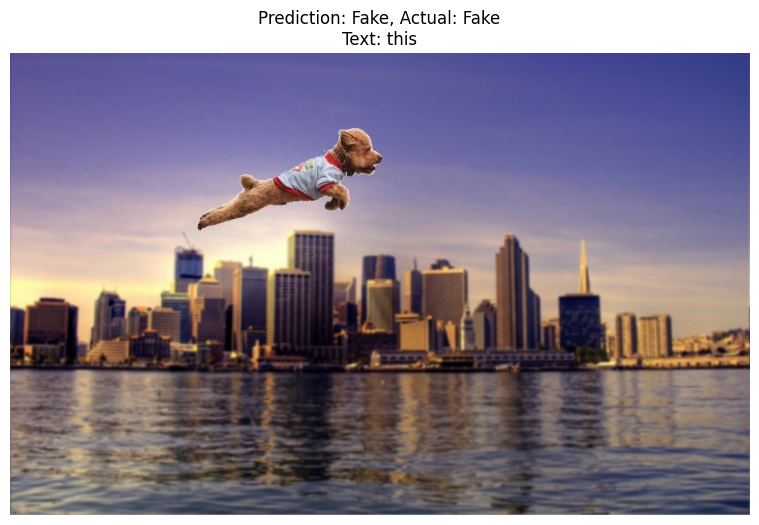

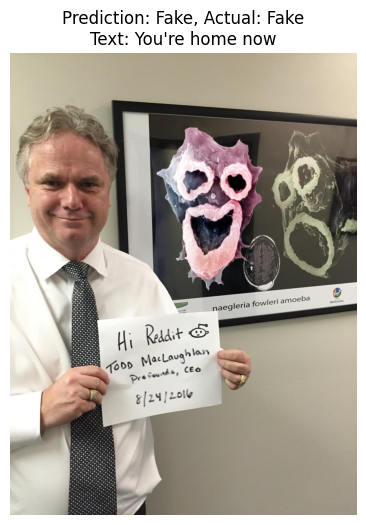

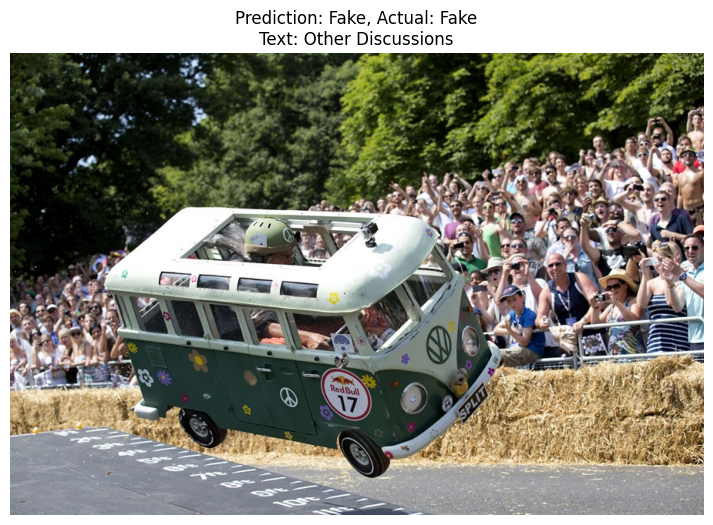

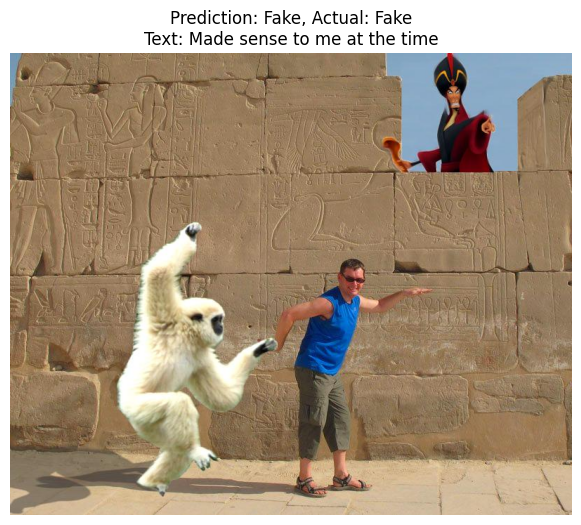

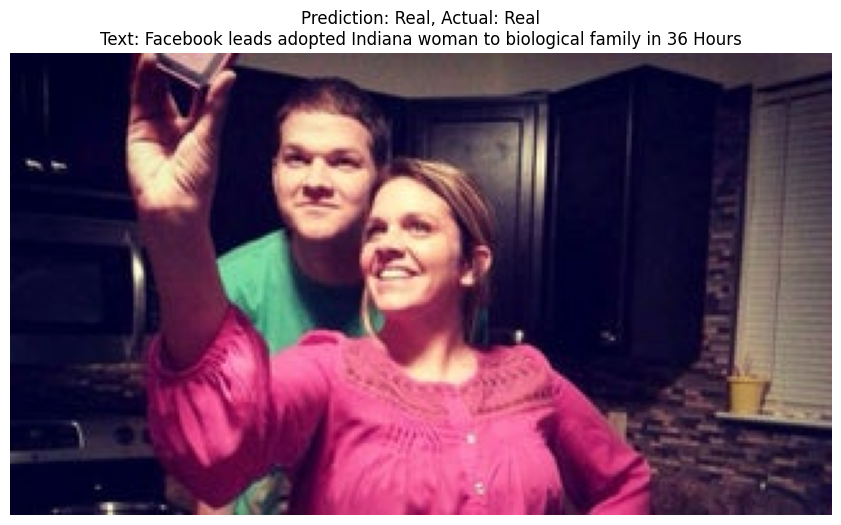

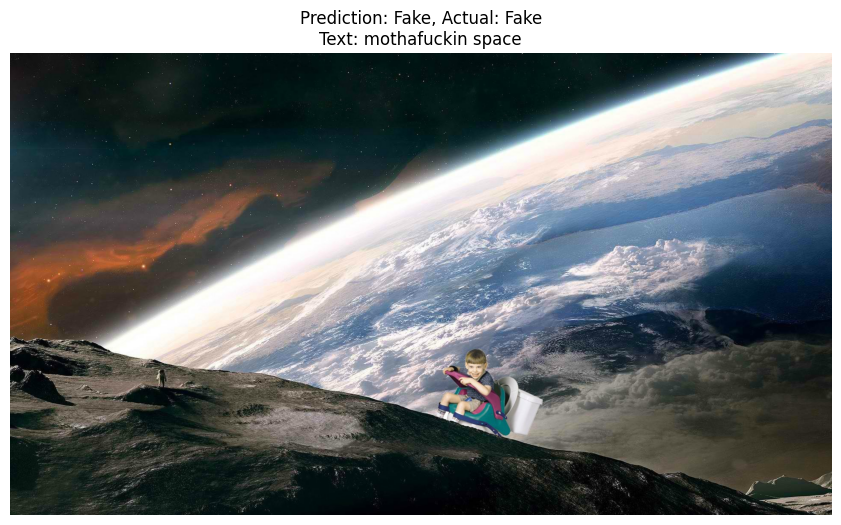

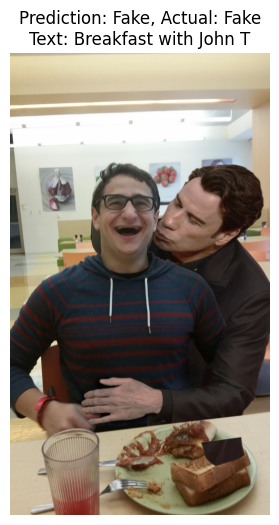

In [ ]:
label_map = {0.0: "Fake", 1.0: "Real"}

for i in range(10):
    text = test_texts[i]
    image_path = test_images[i] # Convert CHW to HWC for displaying
    predicted_label = label_map[int(all_preds[i])]
    actual_label = label_map[int(all_labels[i])]
    image = Image.open(image_path).convert("RGB")

    # Display the result
    plt.figure(figsize=(20, 6))
    plt.imshow(image)
    plt.title(f'Prediction: {predicted_label}, Actual: {actual_label}\nText: {text}')
    plt.axis('off')
    plt.show()

### Summary

**The above results shows that CLIP + BLIP Based Model with hybrid fusion technique performance was the best with accuracy of	90.63%, precision of 92.04%, recall of 90.73%, and f1-score of 91.38%.**

In [ ]:
import gc

del clip_Model
del preprocess

gc.collect()

14

# Experiments with Non-scalable Solutions

---



# 3. BERT + ResNet 50

**Load the models**

In [ ]:
from transformers import AutoTokenizer, AutoImageProcessor, ResNetModel, BertModel

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
image_processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")

**Create the dataset pipeline to preprocess data**

In [ ]:
class FakeNewsDataset(Dataset):
    def __init__(self, texts, images, labels, tokenizer,image_processor):
        self.texts = texts
        self.images = images
        self.labels = labels
        self.tokenizer = tokenizer
        self.image_processor = image_processor

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx]).convert('RGB')

        image = self.image_processor(image)
        text = self.tokenizer(self.texts[idx], return_tensors="pt", padding=True, truncation=True)
        label = self.labels[idx]
        return text, image, label

**Implement the model architecture**

In [ ]:
class BertResNetCombinedModel(nn.Module):

    def __init__(self):
        super(BertResNetCombinedModel, self).__init__()
        self.fc1 = nn.Linear(817, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)

    def forward(self, text_input, image_input):
        with torch.no_grad():

            bert_model = BertModel.from_pretrained("google-bert/bert-base-uncased",device_map='auto')
            bert_output = bert_model(**text_input)

            resnet_model = ResNetModel.from_pretrained("microsoft/resnet-50",device_map='auto')
            image_output = resnet_model(image_input)

        combined_features = torch.cat((bert_output.last_hidden_state[:, 0, :],image_output.last_hidden_state[:, 0, :].reshape(image_output.last_hidden_state[:, 0, :].size(0),-1)), dim=1)

        x = torch.relu(self.fc1(combined_features))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [ ]:
def custom_collate_fn(batch):
    # Unpack the batch
    text_input, image_input, labels = zip(*batch)

    # Process inputs
    text_input_ids = torch.nn.utils.rnn.pad_sequence([x['input_ids'].squeeze(0) for x in text_input], batch_first=True, padding_value=tokenizer.pad_token_id)
    text_attention_mask = torch.nn.utils.rnn.pad_sequence([x['attention_mask'].squeeze(0) for x in text_input], batch_first=True, padding_value=0)

    text_batch = {
        'input_ids': text_input_ids,
        'attention_mask': text_attention_mask
    }

    image_batch = torch.stack(list(image_input))

    labels = torch.tensor(labels)

    return text_batch, image_batch, labels


## Train and Evaluation

In [ ]:
from torchvision import transforms

In [ ]:
#function to train the model
def train_model(model, dataloader, criterion, optimizer, device, num_epochs=1):
    model.train()
    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for text_inputs, image_inputs, labels in dataloader:
            text_inputs = {k: v.to(device) for k, v in text_inputs.items()}
            image_inputs = image_inputs.to(device)
            labels = labels.to(device).float()

            outputs = bert_Model(text_inputs,image_inputs).to(device)
            loss = criterion(outputs.squeeze(1), labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(dataloader)
        train_losses.append(epoch_loss)
        print(f"learning_rate: {lr}, batch_size: {batch_size}")
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    return train_losses

In [ ]:
#function to validate the model
def evaluate_model(model, dataloader, criterion, device,accuracy = 0):
    model.eval()
    correct = 0
    total = 0
    val_losses = []
    all_preds = []
    all_labels = []
    with torch.no_grad():
        running_loss = 0.0
        for text_inputs, image_inputs, labels in dataloader:
            text_inputs = {k: v.to(device) for k, v in text_inputs.items()}
            image_inputs = image_inputs.to(device)
            labels = labels.to(device).float()

            outputs = model(text_inputs, image_inputs).squeeze()
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        val_loss = running_loss / len(dataloader)
        val_losses.append(val_loss)

    accuracy = correct / total
    print(f'Validation Accuracy: {accuracy * 100:.2f}%')
    classification = classification_report(all_labels, all_preds, target_names=['Fake', 'Real'])
    return val_losses, accuracy, classification

**Hyperparamter tunning**

In [ ]:
param_grid = {
    'learning_rate': [ 1e-3, 1e-4, 1e-5],
    'batch_size': [8,16]
}

image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

texts = train_df['title'].values
images = train_df['Image_Path'].values
labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = FakeNewsDataset(texts, images, labels, tokenizer,image_transform)
val_dataset = FakeNewsDataset(test_texts, test_images, test_labels, tokenizer,image_transform)

best_accuracy = 0
best_params = None
best_classification_report = None

for lr, batch_size in product(*param_grid.values()):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=custom_collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,collate_fn=custom_collate_fn)

    bert_Model = BertResNetCombinedModel().to(device)

    if torch.cuda.is_available():
      bert_Model.cuda()

    loss_fn = nn.BCELoss()
    optimizer =  torch.optim.Adam(bert_Model.parameters(), lr=lr)

   # Training loop
    train_losses = train_model(bert_Model, train_loader, loss_fn, optimizer, device, num_epochs=5)

    # Validation
    val_losses, accuracy,classification = evaluate_model(bert_Model, val_loader, loss_fn, device)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classification_report = classification
        best_params = {'learning_rate': lr, 'batch_size': batch_size, 'loss_fn': loss_fn}
        best_train_losses = train_losses
        best_val_losses = val_losses

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Params: {best_params}")
print(f"Best Classification Report: {best_classification_report}")


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

learning_rate: 0.001, batch_size: 8
Epoch [1/5], Loss: 0.4300
learning_rate: 0.001, batch_size: 8
Epoch [2/5], Loss: 0.3380
learning_rate: 0.001, batch_size: 8
Epoch [3/5], Loss: 0.2927
learning_rate: 0.001, batch_size: 8
Epoch [4/5], Loss: 0.2666
learning_rate: 0.001, batch_size: 8
Epoch [5/5], Loss: 0.2272
Validation Accuracy: 82.90%
learning_rate: 0.001, batch_size: 16
Epoch [1/5], Loss: 0.4293
learning_rate: 0.001, batch_size: 16
Epoch [2/5], Loss: 0.3298
learning_rate: 0.001, batch_size: 16
Epoch [3/5], Loss: 0.3000
learning_rate: 0.001, batch_size: 16
Epoch [4/5], Loss: 0.2568
learning_rate: 0.001, batch_size: 16
Epoch [5/5], Loss: 0.2332
Validation Accuracy: 85.10%
learning_rate: 0.0001, batch_size: 8
Epoch [1/5], Loss: 0.4788
learning_rate: 0.0001, batch_size: 8
Epoch [2/5], Loss: 0.3499
learning_rate: 0.0001, batch_size: 8
Epoch [3/5], Loss: 0.3142
learning_rate: 0.0001, batch_size: 8
Epoch [4/5], Loss: 0.2856
learning_rate: 0.0001, batch_size: 8
Epoch [5/5], Loss: 0.2520
Vali

# 4. BERT + ViT

**Implement the model architecture**

In [ ]:
class multimodal_attention(nn.Module):
    """
    dot-product attention mechanism
    """
    def __init__(self, attention_dropout=0.5):
        super(multimodal_attention, self).__init__()
        self.dropout = nn.Dropout(attention_dropout)
        self.softmax = nn.Softmax(dim=2)

    def forward(self, q, k, v, scale=None, attn_mask=None):

        attention = torch.matmul(q, k.transpose(-2, -1))
        #print('attention.shape:{}'.format(attention.shape))
        if scale:
            attention = attention * scale

        attention = self.softmax(attention)
        #print('attention.shftmax:{}'.format(attention))
        attention = self.dropout(attention)
        attention = torch.matmul(attention, v)
        #print('attn_final.shape:{}'.format(attention.shape))

        return attention


class MultiHeadAttention(nn.Module):
    def __init__(self, model_dim=256, num_heads=8, dropout=0.5):
        super(MultiHeadAttention, self).__init__()

        self.model_dim = model_dim
        self.dim_per_head = model_dim // num_heads
        self.num_heads = num_heads
        self.linear_k = nn.Linear(1, self.dim_per_head * num_heads, bias=False)
        self.linear_v = nn.Linear(1, self.dim_per_head * num_heads, bias=False)
        self.linear_q = nn.Linear(1, self.dim_per_head * num_heads, bias=False)

        self.dot_product_attention = multimodal_attention(dropout)
        self.linear_final = nn.Linear(model_dim, 1, bias=False)
        self.dropout = nn.Dropout(dropout)
        self.layer_norm = nn.LayerNorm(model_dim)

    def forward(self, query, key, value, attn_mask=None):
        residual = query
        query = query.unsqueeze(-1)
        key = key.unsqueeze(-1)
        value = value.unsqueeze(-1)

        dim_per_head = self.dim_per_head
        num_heads = self.num_heads

        # linear projection
        key = self.linear_k(key)
        value = self.linear_v(value)
        query = self.linear_q(query)

        # split by heads
        key = key.view(-1, num_heads, self.model_dim, dim_per_head)
        value = value.view(-1, num_heads, self.model_dim, dim_per_head)
        query = query.view(-1, num_heads, self.model_dim, dim_per_head)

        # scaled dot product attention
        scale = (key.size(-1) // num_heads)**-0.5
        attention = self.dot_product_attention(query, key, value,
                                               scale, attn_mask)

        attention = attention.view(-1, self.model_dim, dim_per_head * num_heads)

        # final linear projection
        output = self.linear_final(attention).squeeze(-1)
        #print('output.shape:{}'.format(output.shape))
        # dropout
        output = self.dropout(output)
        # add residual and norm layer
        output = self.layer_norm(residual + output)

        return output


class PositionalWiseFeedForward(nn.Module):
    """
    Fully-connected network
    """
    def __init__(self, model_dim=256, ffn_dim=2048, dropout=0.5):
        super(PositionalWiseFeedForward, self).__init__()
        self.w1 = nn.Linear(model_dim, ffn_dim)
        self.w2 = nn.Linear(ffn_dim, model_dim)

        self.dropout = nn.Dropout(dropout)
        self.layer_norm = nn.LayerNorm(model_dim)

    def forward(self, x):
        residual = x

        x = self.w2(F.relu(self.w1(x)))
        x = self.dropout(x)
        x += residual

        x = self.layer_norm(x)
        output = x
        return output


class multimodal_fusion_layer(nn.Module):
    """
    A layer of fusing features
    """
    def __init__(self, model_dim=256, num_heads=8, ffn_dim=2048, dropout=0.5):
        super(multimodal_fusion_layer, self).__init__()
        self.attention_1 = MultiHeadAttention(model_dim, num_heads, dropout)
        self.attention_2 = MultiHeadAttention(model_dim, num_heads, dropout)

        self.feed_forward_1 = PositionalWiseFeedForward(model_dim, ffn_dim, dropout)
        self.feed_forward_2 = PositionalWiseFeedForward(model_dim, ffn_dim, dropout)

        self.fusion_linear = nn.Linear(model_dim*2, model_dim)

    def forward(self, image_output, text_output, attn_mask=None):

        output_1 = self.attention_1(image_output, text_output, text_output,
                                 attn_mask)

        output_2 = self.attention_2(text_output, image_output, image_output,
                                 attn_mask)


        #print('attention out_shape:{}'.format(output.shape))
        output_1 = self.feed_forward_1(output_1)
        output_2 = self.feed_forward_2(output_2)

        output = torch.cat([output_1, output_2], dim=1)
        output = self.fusion_linear(output)

        return output

In [ ]:
class NetShareFusion(nn.Module):
    def __init__(self,model_dim,drop_and_BN, img_size=250,num_labels=2,num_layers=1,num_heads=8,ffn_dim=2048,dropout=0.5):

        super(NetShareFusion, self).__init__()

        self.CASED = 'google-bert/bert-base-uncased'
        self.model_dim = model_dim
        # self.pthfile = pthfile
        self.drop_and_BN = drop_and_BN

        #text
        self.config = BertConfig.from_pretrained(self.CASED)

        self.bert = BertModel.from_pretrained(self.CASED)
        self.linear_text = nn.Linear(768, model_dim)
        self.bn_text = nn.BatchNorm1d(model_dim)

        self.dropout = nn.Dropout(dropout)

        #image
        self.vgg = ViTModel.from_pretrained('google/vit-base-patch16-224')


        self.linear_image = nn.Linear(768, model_dim)
        self.bn_vgg = nn.BatchNorm1d(model_dim)


        #multimodal fusion
        self.fusion_layers = nn.ModuleList([
            multimodal_fusion_layer(model_dim, num_heads, ffn_dim, dropout)
            for _ in range(num_layers)
        ])

        #classifier
        self.linear1 = nn.Linear(model_dim, 35)
        self.bn_1 = nn.BatchNorm1d(35)
        self.linear2 = nn.Linear(35, num_labels)
        self.softmax = nn.Softmax(dim=1)

    def drop_BN_layer(self, x, part='dct'):
        if part == 'dct':
            bn = self.bn_dct
        elif part == 'vgg':
            bn = self.bn_vgg
        elif part == 'bert':
            bn = self.bn_text

        if self.drop_and_BN == 'drop-BN':
            x = self.dropout(x)
            x = bn(x)
        elif self.drop_and_BN == 'BN-drop':
            x = bn(x)
            x = self.dropout(x)
        elif self.drop_and_BN == 'drop-only':
            x = self.dropout(x)
        elif self.drop_and_BN == 'BN-only':
            x = bn(x)
        elif self.drop_and_BN == 'none':
            pass

        return x

    def forward(self, text_input, image_input):

        #textual feature
        bert_output = self.bert(**text_input)
        text_output = bert_output[1]  #the representation of the whole sentence

        text_output = F.relu(self.linear_text(bert_output.last_hidden_state[:, 0, :]))
        text_output = self.drop_BN_layer(text_output, part='bert')
#         print('text_output:{}'text_output.shape)

        #visual feature
        output = self.vgg(**image_input)
        # print(output.last_hidden_state[:, 0, :].shape)

        output = F.relu(self.linear_image(output.last_hidden_state[:, 0, :]))
        output = self.drop_BN_layer(output, part='vgg')

        for fusion_layer in self.fusion_layers:
            output = fusion_layer(output, text_output, text_input['attention_mask'])
            #print('fusion output_shape:{}'.format(output.shape))

        output = F.relu(self.linear1(output))
        output = self.dropout(output)
        #output = self.bn_1(output)
        output = self.linear2(output)
        #print('output_size:{}'.format(output.shape))
        y_pred_prob = self.softmax(output)

        return output, y_pred_prob


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, texts, image_paths, labels, text_tokenizer, image_processor):
        self.texts = texts
        self.image_paths = image_paths
        self.labels = labels
        self.text_tokenizer = text_tokenizer
        self.image_processor = image_processor

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # Process text
        text = self.texts[idx]
        text_inputs = self.text_tokenizer(text, return_tensors="pt", padding=True, truncation=True)

        # Process image
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        image_inputs = self.image_processor(images=image, return_tensors="pt")

        # Get label
        label = torch.tensor(self.labels[idx], dtype=torch.float32)

        return text_inputs, image_inputs, label


In [ ]:
def custom_collate_fn(batch):
    # Unpack the batch
    text_inputs, image_inputs, labels = zip(*batch)

    # Process text inputs
    input_ids = torch.nn.utils.rnn.pad_sequence([x['input_ids'].squeeze(0) for x in text_inputs], batch_first=True, padding_value=text_tokenizer.pad_token_id)
    attention_mask = torch.nn.utils.rnn.pad_sequence([x['attention_mask'].squeeze(0) for x in text_inputs], batch_first=True, padding_value=0)
    text_batch = {
        'input_ids': input_ids,
        'attention_mask': attention_mask
    }

    # Process image inputs
    pixel_values = torch.stack([x['pixel_values'].squeeze(0) for x in image_inputs])
    image_batch = {
        'pixel_values': pixel_values
    }

    # Process labels
    labels = torch.tensor(labels)

    return text_batch, image_batch, labels


## Train and Evaluation

In [ ]:
def flat_accuracy(preds, labels):
        pred_flat = np.argmax(preds, axis=1)
        labels_flat = labels
        return np.sum(pred_flat == labels_flat) / len(labels)

In [ ]:
param_grid = {
    'learning_rate': [1e-4, 1e-5],
    'batch_size': [8]
}

test_loss_values = []
acc_values, test_acc_values = [], []
test_precision_values = []
test_recall_values = []
test_f1_values = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

text_tokenizer = BertTokenizer.from_pretrained('google-bert/bert-base-uncased')
image_processor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
# AutoImageProcessor.from_pretrained("microsoft/resnet-50")
#

train_texts = train_df['title'].values
train_images = train_df['Image_Path'].values
train_labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = CustomDataset(train_texts, train_images, train_labels, text_tokenizer, image_processor)
val_dataset = CustomDataset(test_texts, test_images, test_labels, text_tokenizer, image_processor)

best_accuracy = 0
best_params = None

for lr, batch_size in product(*param_grid.values()):

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=custom_collate_fn)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False,collate_fn=custom_collate_fn)

    model = NetShareFusion(768, 'none').to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer =  torch.optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(5):  # Using fewer epochs for faster tuning
        model.train()
        for text_inputs, image_inputs, labels in train_loader:
            text_inputs = {k: v.to(device) for k, v in text_inputs.items()}
            image_inputs = {k: v.to(device) for k, v in image_inputs.items()}
            labels = labels.to(device)

            outputs = model(text_inputs, image_inputs)

            # loss_input = outputs[0]
            loss = criterion(outputs[0],  torch.tensor(labels,dtype=torch.long))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    test_batch_loss = []
    test_batch_acc = []
    report_label = []
    report_predict = []

    best_test_acc = 0

    for text_inputs, image_inputs, labels in val_loader:
        text_inputs = {k: v.squeeze(1).to(device) for k, v in text_inputs.items()}
        image_inputs = {k: v.squeeze(1).to(device) for k, v in image_inputs.items()}
        test_label = labels.to(device)

        with torch.no_grad():
            outputs = model(text_inputs,image_inputs)

        test_loss_input = outputs[0]
        test_loss = criterion(test_loss_input, torch.tensor(test_label,dtype=torch.long))

        predict = torch.max(outputs[1].cpu().detach(), 1)[1]

        test_pred_input = torch.sigmoid(outputs[1]).cpu().detach().numpy().tolist()  #output[1]
        test_label = test_label.cpu().detach().numpy().tolist()

        test_acc = flat_accuracy(test_pred_input, test_label)

        test_batch_loss.append(test_loss.detach().item())
        test_batch_acc.append(test_acc)

        for j in range(len(test_label)):
              report_label.append(test_label[j])
              report_predict.append(predict[j])

    test_epoch_loss = sum(test_batch_loss) / len(val_loader)
    test_epoch_acc = sum(test_batch_acc) / len(val_loader)
    report = classification_report(report_label, report_predict, output_dict = True)

    if test_epoch_acc > best_test_acc:
        best_test_acc = test_epoch_acc
        # self.condition_save(epoch_index, test_epoch_acc, report)

    test_loss_values.append(test_epoch_loss)
    test_acc_values.append(test_epoch_acc)
    test_precision_values.append(float(report["macro avg"]["precision"]))
    test_recall_values.append(float(report["macro avg"]["recall"]))
    test_f1_values.append(float(report["macro avg"]["f1-score"]))


best_accuracy = np.max(test_acc_values)
print(f"Accuracy: {best_accuracy}")
# print(f"Best Params: {best_params}")


/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-22-9a0c7b9b6530>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(outputs[0],  torch.tensor(labels,dtype=torch.long))
<ipython-input-22-9a0c7b9b6530>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourc

Accuracy: 0.84


# 5. T5 + ViT Based Model

## Early Fusion (Concat Fusion Method)

**Create dataset pipeline**

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, texts, image_paths, labels, text_tokenizer, image_processor):
        self.texts = texts
        self.image_paths = image_paths
        self.labels = labels
        self.text_tokenizer = text_tokenizer
        self.image_processor = image_processor

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # Process text
        text = self.texts[idx]
        text_inputs = self.text_tokenizer(text, return_tensors="pt", padding=True, truncation=True)

        # Process image
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        image_inputs = self.image_processor(images=image, return_tensors="pt")

        # Get label
        label = torch.tensor(self.labels[idx], dtype=torch.float32)

        return text_inputs, image_inputs, label


In [ ]:
def custom_collate_fn(batch):
    # Unpack the batch
    text_inputs, image_inputs, labels = zip(*batch)

    # Process text inputs
    input_ids = torch.nn.utils.rnn.pad_sequence([x['input_ids'].squeeze(0) for x in text_inputs], batch_first=True, padding_value=text_tokenizer.pad_token_id)
    attention_mask = torch.nn.utils.rnn.pad_sequence([x['attention_mask'].squeeze(0) for x in text_inputs], batch_first=True, padding_value=0)
    text_batch = {
        'input_ids': input_ids,
        'attention_mask': attention_mask
    }

    # Process image inputs
    pixel_values = torch.stack([x['pixel_values'].squeeze(0) for x in image_inputs])
    image_batch = {
        'pixel_values': pixel_values
    }

    # Process labels
    labels = torch.tensor(labels)

    return text_batch, image_batch, labels


**Create data loader pipeline**

In [ ]:
# Example data
texts = train_df['title'].values
image_paths = train_df['Image_Path'].values
labels = train_df['2_way_label'].values

# Initialize the tokenizers and processors
text_tokenizer = T5Tokenizer.from_pretrained('t5-small')
image_processor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

# Create dataset and dataloader
dataset = CustomDataset(texts, image_paths, labels, text_tokenizer, image_processor)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


**Implement the T5 + ViT based model architecture**

In [ ]:
class T5ViTCombinedModel(nn.Module):
    def __init__(self):
        super(T5ViTCombinedModel, self).__init__()
        self.text_model = T5EncoderModel.from_pretrained('t5-small')
        self.image_model = ViTModel.from_pretrained('google/vit-base-patch16-224')
        self.fc1 = nn.Linear(self.text_model.config.d_model + self.image_model.config.hidden_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)

    def forward(self, text_inputs, image_inputs):
        # Extract text embeddings

        text_outputs = self.text_model(**text_inputs)
        text_embeddings = text_outputs.last_hidden_state[:, 0, :]

        # Extract image embeddings
        image_outputs = self.image_model(**image_inputs)
        image_embeddings = image_outputs.last_hidden_state[:, 0, :]

        # Combine embeddings
        combined_embeddings = torch.cat((text_embeddings, image_embeddings), dim=1)
        x = torch.relu(self.fc1(combined_embeddings))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x


### Train and Evaluation

In [ ]:
#define the function for model training
def train_model(model, dataloader, criterion, optimizer, device, num_epochs=5):
    model.train()
    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for text_inputs, image_inputs, labels in dataloader:
            text_inputs = {k: v.to(device) for k, v in text_inputs.items()}
            image_inputs = {k: v.to(device) for k, v in image_inputs.items()}
            labels = labels.to(device)

            outputs = model(text_inputs, image_inputs).squeeze()
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(dataloader)
        train_losses.append(epoch_loss)
        print(f"learning_rate: {lr}, batch_size: {batch_size}")
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    return train_losses

In [ ]:
#define the model validation function
def evaluate_model(model, dataloader, criterion, device,accuracy = 0):
    model.eval()
    correct = 0
    total = 0
    val_losses = []
    all_preds = []
    all_labels = []
    with torch.no_grad():
        running_loss = 0.0
        for text_inputs, image_inputs, labels in dataloader:
            text_inputs = {k: v.squeeze(1).to(device) for k, v in text_inputs.items()}
            image_inputs = {k: v.squeeze(1).to(device) for k, v in image_inputs.items()}
            labels = labels.to(device)

            outputs = model(text_inputs,image_inputs).squeeze()
            loss = criterion(outputs,  labels)
            running_loss += loss.item()

            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        val_loss = running_loss / len(dataloader)
        val_losses.append(val_loss)

    accuracy = correct / total
    print(f'Validation Accuracy: {accuracy * 100:.2f}%')
    classification = classification_report(all_labels, all_preds, target_names=['Fake', 'Real'])
    return val_losses, accuracy, classification

**Hyper-parameter Tunning**

In [ ]:
param_grid = {
    'learning_rate': [1e-2, 1e-3, 1e-4],
    'batch_size': [8, 16]
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

text_tokenizer = T5Tokenizer.from_pretrained('t5-small')
image_processor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

train_texts = train_df['title'].values
train_images = train_df['Image_Path'].values
train_labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = CustomDataset(train_texts, train_images, train_labels, text_tokenizer, image_processor)
val_dataset = CustomDataset(test_texts, test_images, test_labels, text_tokenizer, image_processor)

best_accuracy = 0
best_params = None

for lr, batch_size in product(*param_grid.values()):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=custom_collate_fn)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False,collate_fn=custom_collate_fn)

    model = T5ViTCombinedModel().to(device)
    criterion = nn.BCELoss()
    optimizer =  torch.optim.Adam(model.parameters(), lr=lr)

    train_losses = train_model(model, train_loader, criterion, optimizer, device, num_epochs=5)

    val_losses, accuracy,classification = evaluate_model(model, val_loader, criterion, device)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classification_report = classification
        best_params = {'learning_rate': lr, 'batch_size': batch_size, 'loss_fn': criterion}
        best_train_losses = train_losses
        best_val_losses = val_losses

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Params: {best_params}")
print(f"Best Classification Report: {best_classification_report}")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


learning_rate: 0.01, batch_size: 8
Epoch [1/5], Loss: 0.7382
learning_rate: 0.01, batch_size: 8
Epoch [2/5], Loss: 0.6362
learning_rate: 0.01, batch_size: 8
Epoch [3/5], Loss: 0.6724
learning_rate: 0.01, batch_size: 8
Epoch [4/5], Loss: 0.6727
learning_rate: 0.01, batch_size: 8
Epoch [5/5], Loss: 0.6717
Validation Accuracy: 58.60%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Some weights of ViTModel were not initialized from the model che

learning_rate: 0.01, batch_size: 16
Epoch [1/5], Loss: 42.6264
learning_rate: 0.01, batch_size: 16
Epoch [2/5], Loss: 39.5500
learning_rate: 0.01, batch_size: 16
Epoch [3/5], Loss: 39.5500
learning_rate: 0.01, batch_size: 16
Epoch [4/5], Loss: 39.5500
learning_rate: 0.01, batch_size: 16
Epoch [5/5], Loss: 39.5500
Validation Accuracy: 58.60%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Some weights of ViTModel were not initialized from the model che

learning_rate: 0.001, batch_size: 8
Epoch [1/5], Loss: 0.4361
learning_rate: 0.001, batch_size: 8
Epoch [2/5], Loss: 0.2772
learning_rate: 0.001, batch_size: 8
Epoch [3/5], Loss: 0.2062
learning_rate: 0.001, batch_size: 8
Epoch [4/5], Loss: 0.1381
learning_rate: 0.001, batch_size: 8
Epoch [5/5], Loss: 0.1029
Validation Accuracy: 84.30%


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


learning_rate: 0.001, batch_size: 16
Epoch [1/5], Loss: 0.4666
learning_rate: 0.001, batch_size: 16
Epoch [2/5], Loss: 0.2624
learning_rate: 0.001, batch_size: 16
Epoch [3/5], Loss: 0.1537
learning_rate: 0.001, batch_size: 16
Epoch [4/5], Loss: 0.1073
learning_rate: 0.001, batch_size: 16
Epoch [5/5], Loss: 0.0830
Validation Accuracy: 84.30%


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


learning_rate: 0.0001, batch_size: 8
Epoch [1/5], Loss: 0.4689
learning_rate: 0.0001, batch_size: 8
Epoch [2/5], Loss: 0.2330
learning_rate: 0.0001, batch_size: 8
Epoch [3/5], Loss: 0.0995
learning_rate: 0.0001, batch_size: 8
Epoch [4/5], Loss: 0.0720
learning_rate: 0.0001, batch_size: 8
Epoch [5/5], Loss: 0.0560
Validation Accuracy: 87.20%


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


learning_rate: 0.0001, batch_size: 16
Epoch [1/5], Loss: 0.5031
learning_rate: 0.0001, batch_size: 16
Epoch [2/5], Loss: 0.2191
learning_rate: 0.0001, batch_size: 16
Epoch [3/5], Loss: 0.0796
learning_rate: 0.0001, batch_size: 16
Epoch [4/5], Loss: 0.0487
learning_rate: 0.0001, batch_size: 16
Epoch [5/5], Loss: 0.0191
Validation Accuracy: 84.40%
Best Accuracy: 0.872
Best Params: {'learning_rate': 0.0001, 'batch_size': 8, 'loss_fn': BCELoss()}
Best Classification Report:               precision    recall  f1-score   support

        Fake       0.88      0.90      0.89       586
        Real       0.85      0.83      0.84       414

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



## Decision Level Fusion

Implement T5+ ViT model with decision level fusion

In [ ]:
class LateFusionModel(nn.Module):
    def __init__(self, text_model, image_model, hidden_dim):
        super(LateFusionModel, self).__init__()
        self.text_model = text_model
        self.image_model = image_model
        self.fc_text = nn.Linear(self.text_model.config.d_model, hidden_dim)
        self.fc_image = nn.Linear(self.image_model.config.hidden_size, hidden_dim)
        self.fc_combined = nn.Linear(hidden_dim * 2, 256)
        self.fc_final = nn.Linear(256, 1)

    def forward(self, text_inputs, image_inputs):
        # Extract text embeddings
        text_outputs = self.text_model(**text_inputs)
        text_embeddings = text_outputs.last_hidden_state[:, 0, :]  # Use the [CLS] token representation
        text_features = torch.relu(self.fc_text(text_embeddings))

        # Extract image embeddings
        image_outputs = self.image_model(**image_inputs)
        image_embeddings = image_outputs.last_hidden_state[:, 0, :]  # Use the [CLS] token representation
        image_features = torch.relu(self.fc_image(image_embeddings))

        # Combine embeddings using late fusion
        combined_features = torch.cat((text_features, image_features), dim=1)
        x = torch.relu(self.fc_combined(combined_features))
        x = torch.sigmoid(self.fc_final(x))
        return x


### Train and Evaluation

**Hyperparameter tunning**

In [ ]:
param_grid = {
    'learning_rate': [1e-4, 1e-5],
    'batch_size': [8, 16]
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
hidden_dim = 512
text_tokenizer = T5Tokenizer.from_pretrained('t5-small')
image_processor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

text_model = T5EncoderModel.from_pretrained('t5-small')
image_model = ViTModel.from_pretrained('google/vit-base-patch16-224')

train_texts = train_df['title'].values
train_images = train_df['Image_Path'].values
train_labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = CustomDataset(train_texts, train_images, train_labels, text_tokenizer, image_processor)
val_dataset = CustomDataset(test_texts, test_images, test_labels, text_tokenizer, image_processor)

best_accuracy = 0
best_params = None

for lr, batch_size in product(*param_grid.values()):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=custom_collate_fn)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False,collate_fn=custom_collate_fn)

    model = LateFusionModel(text_model, image_model, hidden_dim).to(device)
    criterion = nn.BCELoss()
    optimizer =  torch.optim.Adam(model.parameters(), lr=lr)

    train_losses = train_model(model, train_loader, criterion, optimizer, device, num_epochs=5)

    val_losses, accuracy,classification = evaluate_model(model, val_loader, criterion, device)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classification_report = classification
        best_params = {'learning_rate': lr, 'batch_size': batch_size, 'loss_fn': criterion}
        best_train_losses = train_losses
        best_val_losses = val_losses

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Params: {best_params}")
print(f"Best Classification Report: {best_classification_report}")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


learning_rate: 0.0001, batch_size: 8
Epoch [1/5], Loss: 0.4556
learning_rate: 0.0001, batch_size: 8
Epoch [2/5], Loss: 0.2322
learning_rate: 0.0001, batch_size: 8
Epoch [3/5], Loss: 0.1206
learning_rate: 0.0001, batch_size: 8
Epoch [4/5], Loss: 0.0628
learning_rate: 0.0001, batch_size: 8
Epoch [5/5], Loss: 0.0493
Validation Accuracy: 87.10%
learning_rate: 0.0001, batch_size: 16
Epoch [1/5], Loss: 0.1159
learning_rate: 0.0001, batch_size: 16
Epoch [2/5], Loss: 0.0096
learning_rate: 0.0001, batch_size: 16
Epoch [3/5], Loss: 0.0133
learning_rate: 0.0001, batch_size: 16
Epoch [4/5], Loss: 0.0409
learning_rate: 0.0001, batch_size: 16
Epoch [5/5], Loss: 0.0278
Validation Accuracy: 87.10%
learning_rate: 1e-05, batch_size: 8
Epoch [1/5], Loss: 0.2900
learning_rate: 1e-05, batch_size: 8
Epoch [2/5], Loss: 0.0308
learning_rate: 1e-05, batch_size: 8
Epoch [3/5], Loss: 0.0071
learning_rate: 1e-05, batch_size: 8
Epoch [4/5], Loss: 0.0032
learning_rate: 1e-05, batch_size: 8
Epoch [5/5], Loss: 0.0017

## Early Fusion (MCB Pooling Layer Fusion)

The Multimodal Compact Bilinear Pooling layer was introduced by paper "Multimodal Compact Bilinear Pooling for Visual Question Answering and Visual Grounding" (https://arxiv.org/abs/1606.01847). It was experimented as the fusion layer.

The implementation of MCB Pooling Layer is extracted from https://github.com/STomoya/Multimodal_Compact_Bilinear_Pooling/blob/master/MCB/mcb.py

In [ ]:

#Multimodal Compact Bilinear Pooling (MCB from bellow)

#Reference : "Multimodal Compact Bilinear Pooling for Visual Question Answering and Visual Grounding" (https://arxiv.org/abs/1606.01847)

import pickle

def mcb(features1, features2, d:int=512, save=False, filename="mcb_feature.pickle"):

    # sample size check
    if features1.shape[0] != features2.shape[0]:
        _raise_sample_size_exception()

    # count sketch
    h, s = _count_sketch_init([features1.shape[1], features2.shape[1]], d)

    sketch_features1 = []
    sketch_features2 = []

    for v0, v1 in zip(features1, features2):
        sketch_features1.append(_count_sketch(d, h[0], s[0], v0))
        sketch_features2.append(_count_sketch(d, h[1], s[1], v1))

    # fft
    fft_features1 = []
    fft_features2 = []

    for v0, v1 in zip(sketch_features1, sketch_features2):
        fft_features1.append(np.fft.fft(v0))
        fft_features2.append(np.fft.fft(v1))

    # element-wise product
    ewp_features = np.multiply(fft_features1, fft_features2)

    # ifft
    ifft_features = np.fft.ifft(ewp_features)

    # cast to float (only taking the real part from complex matrix)
    mcb_features = np.real(ifft_features)

    # TODO : add element-wise sqrt and l2 normalization

    if save:
        try:
            with open(filename, "wb") as fout:
                pickle.dump(mcb_features, fout)
        except Exception as e:
            raise e

    return mcb_features

def _count_sketch(d, h, s, v):

    cs_vector = np.zeros(d).astype("float64")

    for dim_num, _ in enumerate(v):
        cs_vector[h[dim_num]] += s[dim_num] * v[dim_num]

    return cs_vector

def _count_sketch_init(feature_dims, d):

    h = [None, None]
    s = [None, None]

    for vec_num in range(2):
        h[vec_num] = np.random.randint(0, d-1, size=(feature_dims[vec_num], ))
        s[vec_num] = (np.floor(np.random.uniform(0, 2, size=(feature_dims[vec_num], ))) * 2 - 1).astype("int64")

    return h, s


# exceptions
class MCBException(Exception):
    """base class for mcb exceptions"""

class SampleSizeException(MCBException):
    """raise when sample size of two features does not match"""

def _raise_sample_size_exception():
    raise SampleSizeException("size of samples does not match")

Implementation of the model architecture

In [ ]:
class CombinedModel(nn.Module):
    def __init__(self):
        super(CombinedModel, self).__init__()
        self.text_model = T5EncoderModel.from_pretrained('t5-small')
        self.image_model = ViTModel.from_pretrained('google/vit-base-patch16-224')

        self.fc1 = nn.Linear(512, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 1)
        # self.double()

    def forward(self, text_inputs, image_inputs):
        # Extract text embeddings
        text_outputs = self.text_model(**text_inputs)
        text_embeddings = text_outputs.last_hidden_state[:, 0, :]

        # Extract image embeddings
        image_outputs = self.image_model(**image_inputs)
        image_embeddings = image_outputs.last_hidden_state[:, 0, :]

        # Combine embeddings using MCB pooling
        combined_embeddings = mcb(text_embeddings, image_embeddings)

        input = torch.from_numpy(combined_embeddings)

        x = torch.relu(self.fc1(input.float()))
        x = self.dropout1(x)
        x = torch.sigmoid(self.fc2(x))
        return x

model = CombinedModel()
# .to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Train and Evaluation

Hyper-parameter Tunning

In [ ]:
class MCBCombinedModel(nn.Module):
    def __init__(self,drop_out):
        super(MCBCombinedModel,self).__init__()
        self.text_model = T5EncoderModel.from_pretrained('t5-small')
        self.image_model = ViTModel.from_pretrained('google/vit-base-patch16-224')

        self.fc1 = nn.Linear(512, 256)
        self.dropout1 = nn.Dropout(drop_out)
        self.fc2 = nn.Linear(256, 1)

    def forward(self, text_inputs, image_inputs):
        # Extract text embeddings
        text_outputs = self.text_model(**text_inputs)
        text_embeddings = text_outputs.last_hidden_state[:, 0, :]

        # Extract image embeddings
        image_outputs = self.image_model(**image_inputs)
        image_embeddings = image_outputs.last_hidden_state[:, 0, :]

        # Combine embeddings using MCB pooling
        combined_embeddings = mcb(text_embeddings, image_embeddings)

        input = torch.from_numpy(combined_embeddings)

        x = torch.relu(self.fc1(input.float()))
        x = self.dropout1(x)
        x = torch.sigmoid(self.fc2(x))
        return x


In [ ]:
param_grid = {
    'learning_rate': [1e-2, 1e-3],
    'batch_size': [16],
    'drop_out':[0.1, 0.2, 0.3]
}


text_tokenizer = T5Tokenizer.from_pretrained('t5-small')
image_processor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

train_texts = train_df['title'].values
train_images = train_df['Image_Path'].values
train_labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = CustomDataset(train_texts, train_images, train_labels, text_tokenizer, image_processor)
val_dataset = CustomDataset(test_texts, test_images, test_labels, text_tokenizer, image_processor)

best_accuracy = 0
best_params = None

for lr, batch_size, drop_out in product(*param_grid.values()):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=custom_collate_fn)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False,collate_fn=custom_collate_fn)

    model = MCBCombinedModel(drop_out)
    criterion = nn.BCELoss()
    optimizer =  torch.optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(5):  # Using fewer epochs for faster tuning
        model.train()
        for text_inputs, image_inputs, labels in train_loader:
            text_inputs = {k: v for k, v in text_inputs.items()}
            image_inputs = {k: v for k, v in image_inputs.items()}
            labels = labels

            outputs = model(text_inputs, image_inputs).squeeze()
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    val_predictions = []
    val_targets = []
    with torch.no_grad():
        for text_inputs, image_inputs, labels in val_loader:
            text_inputs = {k: v for k, v in text_inputs.items()}
            image_inputs = {k: v for k, v in image_inputs.items()}
            labels = labels

            outputs = model(text_inputs,image_inputs).squeeze()
            val_predictions.extend(outputs.cpu().numpy())
            val_targets.extend(labels.cpu().numpy())

    val_predictions = np.array(val_predictions) > 0.5
    accuracy = accuracy_score(val_targets, val_predictions)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'learning_rate': lr, 'batch_size': batch_size,'drop_out':drop_out}

print(f"Accuracy: {best_accuracy}")
print(f"Best Params: {best_params}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly i

Accuracy: 0.575
Best Params: {'learning_rate': 0.001, 'batch_size': 16, 'drop_out': 0.2}


# 6. T5 + ViT + CLIP Based Model

## Hybrid Fusion

**Load the models**

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device=device)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 120MiB/s]


Create dataset pipeline to preprocess the data

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, texts, image_paths, labels, text_tokenizer, image_processor, processor):
        self.texts = texts
        self.image_paths = image_paths
        self.labels = labels
        self.text_tokenizer = text_tokenizer
        self.image_processor = image_processor
        self.processor = processor

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # Process text
        text = self.texts[idx]
        text_inputs = self.text_tokenizer(text, return_tensors="pt", padding=True, truncation=True)

        # Process image
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        image_inputs = self.image_processor(images=image, return_tensors="pt")

        label = torch.tensor(self.labels[idx], dtype=torch.float32)

        image_clip = self.processor(image).unsqueeze(0).to(device)
        text_clip = clip.tokenize(text)

        return text_inputs, image_inputs, label, text_clip, image_clip


In [ ]:
def custom_collate_fn(batch):
    # Unpack the batch
    text_inputs, image_inputs, labels, clip_text, clip_image = zip(*batch)

    # Process text inputs
    input_ids = torch.nn.utils.rnn.pad_sequence([x['input_ids'].squeeze(0) for x in text_inputs], batch_first=True, padding_value=text_tokenizer.pad_token_id)
    attention_mask = torch.nn.utils.rnn.pad_sequence([x['attention_mask'].squeeze(0) for x in text_inputs], batch_first=True, padding_value=0)
    text_batch = {
        'input_ids': input_ids,
        'attention_mask': attention_mask
    }

    # Process image inputs
    pixel_values = torch.stack([x['pixel_values'].squeeze(0) for x in image_inputs])
    image_batch = {
        'pixel_values': pixel_values
    }

    text_input = torch.nn.utils.rnn.pad_sequence([x for x in clip_text], batch_first=True, padding_value=text_tokenizer.pad_token_id)
    image_pixel = torch.stack([x for x in clip_image])

    # Process labels
    labels = torch.FloatTensor(labels)


    return text_batch, image_batch, labels, text_input, image_pixel


**Implement the model architecture**

In [ ]:
class T5ViTHybridFusionModel(nn.Module):
    def __init__(self,clip_model):
        super(T5ViTHybridFusionModel, self).__init__()
        self.text_model = T5EncoderModel.from_pretrained('t5-small')
        self.image_model = ViTModel.from_pretrained('google/vit-base-patch16-224')
        self.clip_model = clip_model
        self.fc1 = nn.Linear(self.text_model.config.d_model + self.image_model.config.hidden_size, 512)
        self.fc2= nn.Linear(512, 256)

        self.fc3 = nn.Linear(264, 1)
        self.float()

    def forward(self, text_inputs, image_inputs, clip_text,clip_image):
        # Extract text embeddings
        text_outputs = self.text_model(**text_inputs)
        text_embeddings = text_outputs.last_hidden_state[:, 0, :]

        # Extract image embeddings
        image_outputs = self.image_model(**image_inputs)
        image_embeddings = image_outputs.last_hidden_state[:, 0, :]

        # Combine embeddings
        combined_txt_img_embeddings = torch.cat((text_embeddings, image_embeddings), dim=1)

        x = torch.relu(self.fc1(combined_txt_img_embeddings))
        x = torch.relu(self.fc2(x))

        clip_text, clip_image = self.clip_model(clip_image,clip_text)

        x_combined = torch.cat((x, clip_text,clip_image),  dim=1)

        x = torch.sigmoid(self.fc3(x_combined))

        return x


### Train and Evaluation

In [ ]:
#define the function for model training
def train_model(model, dataloader, criterion, optimizer, device, num_epochs=5):
    model.train()
    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for text_inputs, image_inputs, labels, clip_text, clip_image in dataloader:
            text_inputs = {k: v.to(device) for k, v in text_inputs.items()}
            image_inputs = {k: v.to(device) for k, v in image_inputs.items()}
            labels = labels.to(device).float()

            clip_text = torch.stack(list(clip_text), dim=0).squeeze(1).to(device)
            clip_image = torch.stack(list(clip_image), dim=0).squeeze(1).to(device)

            outputs = model(text_inputs, image_inputs, clip_text, clip_image).to(device)
            loss = criterion(outputs, labels.unsqueeze(1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(dataloader)
        train_losses.append(epoch_loss)
        print(f"learning_rate: {lr}, batch_size: {batch_size}")
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    return train_losses

In [ ]:
#define the validation process for the model
def evaluate_model(model, dataloader, criterion, device,accuracy = 0):
    model.eval()
    correct = 0
    total = 0
    val_losses = []
    all_preds = []
    all_labels = []
    with torch.no_grad():
        running_loss = 0.0
        for text_inputs, image_inputs, labels,clip_text, clip_image in dataloader:
            text_inputs = {k: v.to(device) for k, v in text_inputs.items()}
            image_inputs = {k: v.to(device) for k, v in image_inputs.items()}
            labels = labels.to(device).float()

            clip_text = torch.stack(list(clip_text), dim=0).squeeze(1).to(device)
            clip_image = torch.stack(list(clip_image), dim=0).squeeze(1).to(device)


            outputs = model(text_inputs,image_inputs,clip_text,clip_image).to(device)
            loss = criterion(outputs,  labels.unsqueeze(1))
            running_loss += loss.item()

            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        val_loss = running_loss / len(dataloader)
        val_losses.append(val_loss)

    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Validation Accuracy: {accuracy * 100:.2f}%')
    classification = classification_report(all_labels, all_preds, target_names=['Fake', 'Real'])
    return val_losses, accuracy, classification

**Hyperparameter tunning**

In [ ]:
param_grid = {
    'learning_rate': [1e-3, 1e-4, 1e-5],
    'batch_size': [4]
}

text_tokenizer = T5Tokenizer.from_pretrained('t5-small')
image_processor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

train_texts = train_df['title'].values
train_images = train_df['Image_Path'].values
train_labels = train_df['2_way_label'].values

test_texts = test_df['title'].values
test_images = test_df['Image_Path'].values
test_labels = test_df['2_way_label'].values

train_dataset = CustomDataset(train_texts, train_images, train_labels, text_tokenizer, image_processor,preprocess)
val_dataset = CustomDataset(test_texts, test_images, test_labels, text_tokenizer, image_processor, preprocess)

best_accuracy = 0
best_params = None

for lr, batch_size in product(*param_grid.values()):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=custom_collate_fn)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False,collate_fn=custom_collate_fn)

    model = T5ViTHybridFusionModel(clip_model).to(device)

    if torch.cuda.is_available():
      model.cuda()

    criterion = nn.BCELoss()
    optimizer =  torch.optim.Adam(model.parameters(), lr=lr)

    train_losses = train_model(model, train_loader, criterion, optimizer, device, num_epochs=5)

    val_losses, accuracy,classification = evaluate_model(model, val_loader, criterion, device)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classification_report = classification
        best_params = {'learning_rate': lr, 'batch_size': batch_size, 'loss_fn': criterion}
        best_train_losses = train_losses
        best_val_losses = val_losses

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Params: {best_params}")
print(f"Best Classification Report: {best_classification_report}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


learning_rate: 0.001, batch_size: 4
Epoch [1/5], Loss: 0.4653
learning_rate: 0.001, batch_size: 4
Epoch [2/5], Loss: 0.3278
learning_rate: 0.001, batch_size: 4
Epoch [3/5], Loss: 0.2452
learning_rate: 0.001, batch_size: 4
Epoch [4/5], Loss: 0.1990
learning_rate: 0.001, batch_size: 4
Epoch [5/5], Loss: 0.1622
Validation Accuracy: 84.40%


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


learning_rate: 0.0001, batch_size: 4
Epoch [1/5], Loss: 0.4949
learning_rate: 0.0001, batch_size: 4
Epoch [2/5], Loss: 0.2536
learning_rate: 0.0001, batch_size: 4
Epoch [3/5], Loss: 0.1209
learning_rate: 0.0001, batch_size: 4
Epoch [4/5], Loss: 0.0733
learning_rate: 0.0001, batch_size: 4
Epoch [5/5], Loss: 0.0416
Validation Accuracy: 85.70%


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


learning_rate: 1e-05, batch_size: 4
Epoch [1/5], Loss: 0.7432
learning_rate: 1e-05, batch_size: 4
Epoch [2/5], Loss: 0.3291
learning_rate: 1e-05, batch_size: 4
Epoch [3/5], Loss: 0.1203
learning_rate: 1e-05, batch_size: 4
Epoch [4/5], Loss: 0.0379
learning_rate: 1e-05, batch_size: 4
Epoch [5/5], Loss: 0.0191
Validation Accuracy: 78.80%
Best Accuracy: 0.857
Best Params: {'learning_rate': 0.0001, 'batch_size': 4, 'loss_fn': BCELoss()}
Best Classification Report:               precision    recall  f1-score   support

        Fake       0.88      0.89      0.88       606
        Real       0.83      0.80      0.82       394

    accuracy                           0.86      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.86      0.86      0.86      1000



# Conclusion

🎯 The proposed solution from this study is CLIP + BLIP Based Model with hybrid fusion technique.
This model achieved accuracy of 90.63%, precision of 92.04%, recall of 90.73%, and f1-score of 91.38%.

> Optimal Hyper-parameters
‘learning_rate’: 0.001, ‘batch_size’: 8,
‘oss_fn’: BCELoss(),
‘optimiser’: Adam
‘epochs’ :10

🎯The proposed CLIP + BLIP based solution can handle both the the text and image recognition using a single model and it make use of image-text similarity to decide a text and image is fake or real.